### Notas de aula de Mecânica Quântica <br> Autor: Jonas Maziero

In [1]:
%run init.ipynb

# Método Variacional
Outro método bastante usado para obter soluções aproximadas de sistemas quânticos é o método variacional. A seguir veremos uma versão simples deste método e sua aplicação a alguns sistemas interessantes.

## Teorema variacional (estado fundamental)
Seja $H$ um hamiltoniano com espectro discreto de autovalores e seja 
$$H|\psi_{n}\rangle = E_{n}|\psi_{n}\rangle,\ \text{com } n = 0,1,2,\cdots,$$
tal que
$$E_{n+1}\ge E_{n}.$$
Ou seja, ordenamos os autovaores em ordem não crescente. Seque que
$$\langle H\rangle_{\phi} \ge E_{0}\ \forall \phi \text{ com } ||\phi||=1.$$

### Prova
A prova deste teorema é uma aplicação simples do fato de que o valor médio de uma variável aleatória é um número que está entre seus valores mínimo e máximo. No entanto, vamos repetir aqui essa prova:
\begin{align}
\langle H\rangle_{\phi} & = \sum_{n}E_{n}Pr(E_{n}|\phi) = \sum_{n}E_{n}|\langle\psi_{n}|\phi\rangle|^{2} \\
& \le \sum_{n}E_{0}|\langle\psi_{n}|\phi\rangle|^{2} = E_{0}\sum_{n}|\langle\psi_{n}|\phi\rangle|^{2} = E_{0}\sum_{n}Pr(E_{n}|\phi) = E_{0}(1) \\
& = E_{0},
\end{align}
em que usamos $E_{n}\ge E_{0}$, a regra de Born e a normalização para as probabilidades. <br>
$\square$

#### Exemplo
Vamos considerar o oscilador harmônico quântico unidimensional (OHQ1D):
$$H = \frac{P^{2}}{2m}+\frac{m\omega^{2}X^{2}}{2}.$$
Uma __função de onda teste__ natural, para começar, é uma gaussiana
$$\phi(x) = Ae^{-bx^{2}}.$$
Normalizando,
\begin{align}
& \int_{-\infty}^{\infty}|\phi(x)|^{2}dx = |A|^{2}\int_{-\infty}^{\infty}e^{-2bx^{2}}dx = |A|^{2}\sqrt{\frac{\pi}{2b}} \\
& \therefore\ A = \big(2b/\pi\big)^{1/4},
\end{align}
teremos que
$$\phi(x) = \big(2b/\pi\big)^{1/4}e^{-bx^{2}} = \phi(x,b).$$
Podemos chamar $b$ de __parâmetro variacional__.

Com isso, vem que
\begin{align}
\langle H\rangle_{\phi} & = \frac{1}{2m}\langle P^{2}\rangle_{\phi} + \frac{m\omega^{2}}{2}\langle X^{2}\rangle_{\phi} \\
& = -\hbar^{2}\frac{\sqrt{2b/\pi}}{2m}\int_{-\infty}^{+\infty}dx e^{-bx^{2}}\partial_{xx}e^{-bx^{2}} + \frac{\sqrt{2b/\pi}m\omega^{2}}{2}\int_{-\infty}^{+\infty}dx  x^{2}e^{-2bx^{2}} \\
& = -\hbar^{2}\frac{\sqrt{2b/\pi}}{2m}\Big(4b^{2}\int_{-\infty}^{+\infty}dx x^{2}e^{-bx^{2}} - 2b\int_{-\infty}^{+\infty}dx e^{-2bx^{2}}\Big) + \frac{\sqrt{2b/\pi}m\omega^{2}}{2}\frac{\sqrt{2\pi}}{2^{3}b^{3/2}} \\
& = -\hbar^{2}\frac{\sqrt{2b/\pi}}{2m}\Big(4b^{2}\frac{\sqrt{2\pi}}{2^{3}b^{3/2}} - 2b\sqrt{\pi/2b}\Big) + \frac{m\omega^{2}}{2^{3}b} \\
& = -\hbar^{2}\frac{\sqrt{2b/\pi}}{2m}\Big(-\frac{\sqrt{2\pi b}}{2}\Big) + \frac{m\omega^{2}}{2^{3}b} \\
& = \frac{b\hbar^{2}}{2m} + \frac{m\omega^{2}}{2^{3}b}.
\end{align}

In [52]:
b = symbols('b', positive=True); x = symbols('x')
diff(exp(-b*x**2),x,2)

In [44]:
integrate(exp(-b*x**2),(x,-oo,+oo))

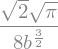

In [45]:
integrate(x**2*exp(-2*b*x**2),(x,-oo,+oo))

Com isso, obtemos o $b$ que nos retorna um valor extremo de $\langle H\rangle_{\phi}$ usando
\begin{align}
& 0 = \partial_{b}\langle H\rangle_{\phi} = \frac{\partial}{\partial b}\Big(\frac{b\hbar^{2}}{2m} + \frac{m\omega^{2}}{2^{3}b}\Big) = \frac{\hbar^{2}}{2m} - \frac{m\omega^{2}}{2^{3}b^{2}} \\
& \therefore\ b_{opt} = \frac{m\omega}{2\hbar}.
\end{align}

Assim temos uma estimativa para a energia do estado fundamental:
\begin{align}
\langle H\rangle_{\phi(b_{opt})} & = \frac{b_{opt}\hbar^{2}}{2m} + \frac{m\omega^{2}}{2^{3}b_{opt}}  =  \frac{m\omega}{2\hbar}\frac{\hbar^{2}}{2m} +  \frac{2\hbar}{m\omega}\frac{m\omega^{2}}{2^{3}} \\
&  =  \frac{m\omega}{2\hbar}\frac{\hbar^{2}}{2m} +  \frac{2\hbar}{m\omega}\frac{m\omega^{2}}{2^{3}} = \hbar\omega(1/2),
\end{align}
que coincide com a energia do estado fundamental do OHQ1D. Isso ocorreu porquê escolhemos uma função de onda teste que tem a mesma forma da autofunção correspondente ao estado fundamental do OHQ1D.

## Teorema variacional (1º estado excitado)
Seja $H$ um hamiltoniano com espectro discreto de autovalores e seja $H|\psi_{n}\rangle = E_{n}|\psi_{n}\rangle,\ \text{com } n = 0,1,2,\cdots,$ tal que $E_{n+1}\ge E_{n}$, e seja o __vetor de estado teste__ $|\phi\rangle$ ortogonal ao autovetor correspondente à menor energia, $|\psi_{0}\rangle$ (ou ao subespaço correspondente a $E_{0}$, se houver degenerescência), i.e., 
$$\langle\phi|\psi_{0}\rangle :=0.$$
Seque que
$$\langle H\rangle_{\phi} \ge E_{1}.$$

### Prova
Neste caso, teremos que:
\begin{align}
\langle H\rangle_{\phi} & = \sum_{n}E_{n}Pr(E_{n}|\phi) = \sum_{n}E_{n}|\langle\psi_{n}|\phi\rangle|^{2}  \\
& = E_{0}|\langle\psi_{0}|\phi\rangle|^{2} + \sum_{n>0}E_{n}|\langle\psi_{n}|\phi\rangle|^{2}  = E_{0}0 + \sum_{n>0}E_{n}|\langle\psi_{n}|\phi\rangle|^{2} \\
& \ge \sum_{n>0}E_{1}|\langle\psi_{n}|\phi\rangle|^{2} = E_{1}\sum_{n>0}|\langle\psi_{n}|\phi\rangle|^{2}  = E_{1}\Big(|\langle\psi_{0}|\phi\rangle|^{2}+\sum_{n>0}|\langle\psi_{n}|\phi\rangle|^{2}\Big) \\
& = E_{1}\sum_{n}Pr(E_{n}|\phi) = E_{1}(1) \\
& = E_{1}.
\end{align}
$\square$

OBS. Esse teorema pode ser estendido para estados com maior energia (2º, 3º, ... estados excitados). A ideia é a mesma. Por exemplo, para o 2º estado excitado, se usarmos um vetor de estado teste $|\phi\rangle$ ortogonal aos autovetores do estado fundamental, $|\psi_{0}\rangle$, e do 1º estados excitado, $|\psi_{1}\rangle$, teremos que $\langle H\rangle_{\phi}\ge E_{2}.$ 

#### Exemplo
Vamos considerar novamente o OHQ1D. Mas desta vez queremos estimar a energia do 1º estado excitado. Para isso, devemos utilizar uma função teste ortogonal à função de onda do estado fundamental. Como "não conhecemos" a solução exata, usamos uma função teste que seja ortogonal à função teste ótima obtida quando da estimativa da energia do estado fundamental. Podemos usar
$$\phi_{1}(x) = Axe^{-bx^{2}} = \sqrt{\frac{2^{3}b^{3/2}}{\sqrt{2\pi}}}xe^{-bx^{2}}.$$
Pode-se verificar que
$$\langle\phi_{1}|\phi\rangle = \int_{-\infty}^{+\infty}dx\phi_{1}^{*}(x)\phi(x)\propto \int_{-\infty}^{+\infty}xe^{-2bx^{2}}dx=0.$$

In [46]:
integrate(x*exp(-2*b*x**2),(x,-oo,+oo))

Neste caso, teremos
\begin{align}
\langle H\rangle_{\phi_{1}}  & = \frac{1}{2m}\langle P^{2}\rangle_{\phi_{1}} + \frac{m\omega^{2}}{2}\langle X^{2}\rangle_{\phi_{1}} \\
& = -\frac{\hbar^{2}}{2m}\int_{-\infty}^{+\infty}Axe^{-bx^{2}}\partial_{xx}Axe^{-bx^{2}}dx + \frac{m\omega^{2}}{2}\int_{-\infty}^{+\infty}x^{2}A^{2}x^{2}e^{-2bx^{2}} \\
& = -\frac{A^{2}\hbar^{2}}{2m}\int_{-\infty}^{+\infty}xe^{-bx^{2}}\big(4b^{2}x^{3}-6bx\big)e^{-bx^{2}}dx + \frac{A^{2}m\omega^{2}}{2}\int_{-\infty}^{+\infty}x^{4}e^{-2bx^{2}} \\
& = -\frac{A^{2}\hbar^{2}}{2m}\Big(4b^{2}\int_{-\infty}^{+\infty}x^{4}e^{-2bx^{2}}dx -6b\int_{-\infty}^{+\infty}x^{2}e^{-2bx^{2}}dx\Big) + \frac{A^{2}m\omega^{2}}{2}\frac{3\sqrt{2\pi}}{32b^{5/2}} \\
& = -\frac{A^{2}\hbar^{2}}{2m}\Big(4b^{2}\frac{3\sqrt{2\pi}}{32b^{5/2}} -6b\frac{\sqrt{2\pi}}{8b^{3/2}}\Big) + \frac{A^{2}m\omega^{2}}{2}\frac{3\sqrt{2\pi}}{32b^{5/2}} \\
& = -\frac{2^{3}b^{3/2}}{\sqrt{2\pi}}\frac{\hbar^{2}}{2m}\Big(4b^{2}\frac{3\sqrt{2\pi}}{32b^{5/2}} -6b\frac{\sqrt{2\pi}}{8b^{3/2}}\Big) + \frac{2^{3}b^{3/2}}{\sqrt{2\pi}}\frac{m\omega^{2}}{2}\frac{3\sqrt{2\pi}}{32b^{5/2}} \\
& = \frac{3b\hbar^{2}}{2m} + \frac{3m\omega^{2}}{8b}.
\end{align}

In [47]:
diff(x*exp(-b*x**2),x,2)

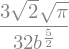

In [48]:
integrate(x**4*exp(-2*b*x**2), (x,-oo,+oo))

Para obter o valor mínimo, fazemos
\begin{align}
& 0 = \partial_{b}\langle H\rangle_{\phi_{1}} = \frac{\partial}{\partial b}\Big(\ \frac{3b\hbar^{2}}{2m} + \frac{3m\omega^{2}}{8b}\Big) =  \frac{3\hbar^{2}}{2m} - \frac{3m\omega^{2}}{8b^{2}} \\
& \therefore\ b_{opt} = \frac{m\omega}{2\hbar}.
\end{align}

Assim, a estimativa varicional para a energia do 1º estado excitado do OHQ1D é
\begin{align}
\langle H\rangle_{\phi_{1}(b_{opt}} & = \frac{3b_{opt}\hbar^{2}}{2m} + \frac{3m\omega^{2}}{8b_{opt}}  =  \frac{m\omega}{2\hbar}\frac{3\hbar^{2}}{2m} +  \frac{2\hbar}{m\omega}\frac{3m\omega^{2}}{8} \\
& = \hbar\omega(3/2) = \hbar\omega(1+1/2),
\end{align}
que também coincide com o resultado exato, também porquê usamos uma função de onda teste com a mesma forma da função de onda exata.

## Estimativa do erro
Vamos começar escrevendo o vetor de estado teste como
$$|\phi\rangle = \sum_{n}c_{n}|\psi_{n}\rangle \equiv \sum_{n}\langle\psi_{n}|\phi\rangle|\psi_{n}\rangle.$$
Se o estado teste é igual ao autovetor correspondente ao estado fundamental, então $|c_{0}|=1$ (lembre que $|c_{n}|\le 1$ e $\sum_{n}|c_{n}|^{2}=1$). Quanto mais longe estamos do estado exato, menor será $|c_{0}|\le 1$. Por conseguinte, podemos quantificar o quão errada está nossa função de onda teste em relação ao autovetor do estado fundamental usando
$$\epsilon(\phi) := 1-|c_{0}|^{2}.$$

Usando que 
$$Pr(E_{n}|\phi) = |\langle\psi_{n}|\phi\rangle|^{2} = |c_{n}|^{2},$$

teremos que (lembre que $E_{0}\le E_{1}\le E_{2}\le\cdots$)
\begin{align}
\langle H\rangle_{\phi}-E_{0} & = \sum_{n}E_{n}Pr(E_{n}|\phi)-E_{0} = \sum_{n}E_{n}|c_{n}|^{2}-E_{0} \\
& = E_{0}|c_{0}|^{2} + \sum_{n>0}E_{n}|c_{n}|^{2} - E_{0} \\
& \ge E_{0}|c_{0}|^{2} + \sum_{n>0}|c_{n}|^{2}E_{1} - E_{0} \\
& = -E_{0}(1-|c_{0}|^{2}) + (1-|c_{0}|^{2})E_{1} \\
& = (E_{1}-E_{0})(1-|c_{0}|^{2}) \\
& = (E_{1}-E_{0})\epsilon(\phi),
\end{align}
em que usamos que
$$\sum_{n}|c_{n}|^{2} = \sum_{n}Pr(E_{n}|\phi)=1 = |c_{0}|^{2}+\sum_{n>0}|c_{n}|^{2}.$$

Então um __limite superior__ para o erro é o seguinte
$$\epsilon(\phi) \le \frac{\langle H\rangle_{\phi}-E_{0}}{E_{1}-E_{0}}.$$
Esse limite superior pode ser calculado se conhecemos $E_{0}$ e $E_{1}$ de experimentos, ou seja, que queremos obter funções de onda que descrevam um sistema com espectro de autovalores conhecido do experimento.

*** provar para um estado qualquer ***

#### Exemplo
Fazendo $\hbar=1$, $\omega=1$ e $m=1$, mostramos na figura abaixo o limite superior para o erro do vetor de estado teste em função do parâmetro livre $b$ para estimativa da energia do estado fundamental do OHQ1D.

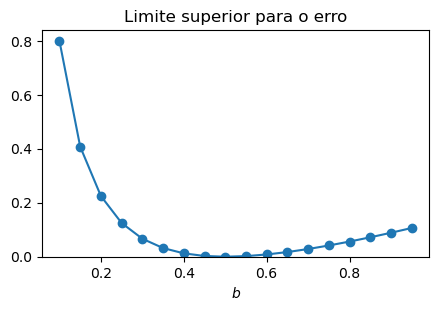

In [4]:
# hb = w = m = 1
import matplotlib
matplotlib.rcParams.update({'font.size':10}); plt.figure(figsize = (5,3), dpi = 100)
x = np.arange(0.1,1,0.05); ub = (x/2 + 1/(8*x) - 1/2)/(1)
plt.plot(x,ub,'-o'); plt.ylim(0,)
plt.xlabel(r'$b$'); plt.title('Limite superior para o erro'); plt.show()

## Limites variacionais inferiores e superiores
### Teorema
Seja $|\phi\rangle$ um vetor de estado teste. Existe algum autovalor $E_{k}$ do hamiltoniano $H$ para o qual a seguinte desigualdade é satisfeita:
$$\langle H\rangle_{\phi}-\sqrt{Var(H)_{\phi}} \le  E_{k} \le \langle H\rangle_{\phi}+\sqrt{Var(H)_{\phi}}.$$

#### Prova
Começamos considerando a variância do hamiltoniano para o estado teste:
\begin{align}
Var(H)_{\phi} & = \big\langle\big(H-\langle H\rangle_{\phi}\mathbb{I}\big)^{2}\big\rangle \\
& = \sum_{n}\big(E_{n}-\langle H\rangle_{\phi}\big)^{2}Pr(E_{n}|\phi).
\end{align}

Para uma dada função de onda teste $\phi$, existe algum autovalor $E_{k}$ que é tão próximo do valor médio $\langle H\rangle_{\phi}$ quanto qualquer outro autovalor. Ou seja, consideremos a __condição__:
$$\big(E_{k}-\langle H\rangle_{\phi}\big)^{2} \le \big(E_{n}-\langle H\rangle_{\phi}\big)^{2}\ \forall n.$$

Com isso, vem que
\begin{align}
Var(H)_{\phi} & \ge \sum_{n}\big(E_{k}-\langle H\rangle_{\phi}\big)^{2}Pr(E_{n}|\phi) = \big(E_{k}-\langle H\rangle_{\phi}\big)^{2}\sum_{n}Pr(E_{n}|\phi) \\
& = \big(E_{k}-\langle H\rangle_{\phi}\big)^{2}.
\end{align}
Então
$$\sqrt{Var(H)_{\phi}} \ge |E_{k}-\langle H\rangle_{\phi}|.$$
Teremos assim os seguintes casos
\begin{align}
E_{k}\ge\langle H\rangle_{\phi} & \therefore\ \sqrt{Var(H)_{\phi}} \ge E_{k}-\langle H\rangle_{\phi} \ \therefore\ E_{k} \le \langle H\rangle_{\phi}+\sqrt{Var(H)_{\phi}}, \\
E_{k}<\langle H\rangle_{\phi} & \therefore\ \sqrt{Var(H)_{\phi}} \ge -E_{k}+\langle H\rangle_{\phi} \ \therefore\ E_{k} \ge \langle H\rangle_{\phi}-\sqrt{Var(H)_{\phi}}.
\end{align}
Com isso segue a seguinte desigualdade dupla:
$$\langle H\rangle_{\phi}-\sqrt{Var(H)_{\phi}} \le  E_{k} \le \langle H\rangle_{\phi}+\sqrt{Var(H)_{\phi}}.$$
$\square$

Note que, dada uma certa função de onda teste $\phi$, essas desigualdades valem somente para o autovalor $E_{k}$ mais próximo de $\langle H\rangle_{\phi}$. Isso é, de certo modo, lógico pois se a variância de $H$ é $0$ isso implica que $\phi$ é autovetor de $H$, e neste caso os limites inferior e superior acima coincidem. 

Por outro lado, podemos usar esses limites inferior e superior para quantificar quanto um certo vetor de estado teste $|\phi\rangle$ está de ser um certo autovetor $|\psi_{k}\rangle$ de $H$.

#### Exemplo
Vamos considerar os cálculos feitos para estimar a energia do estado fundamental do OHQ1D, para o qual temos $\phi(x,b)=(2b/\pi)^{1/4}e^{-bx^{2}}$ e $\langle H\rangle_{\phi} = b\hbar^{2}/2m + m\omega^{2}/8b$. Para calcular a variância, precisamos ainda obter
\begin{align}
\langle H^{2}\rangle_{\phi} & = \langle\phi|H^{2}|\phi\rangle = \langle\phi|\Big(\frac{P^{2}}{2m}+\frac{m\omega^{2}}{2}X^{2}\Big)^{2}|\phi\rangle \\
& = \frac{1}{4m^{2}}\langle\phi|P^{4}|\phi\rangle + \frac{m^{2}\omega^{4}}{4}\langle\phi|X^{4}|\phi\rangle + \frac{\omega^{2}}{4}\langle\phi|\big(P^{2}X^{2}+X^{2}P^{2}\big)|\phi\rangle.
\end{align}


Passemos para o cálculo desses valores médios. Começamos com
\begin{align}
\langle\phi|P^{4}|\phi\rangle & = \int_{-\infty}^{+\infty}dx\phi^{*}\big(-i\hbar\partial_{x}\big)^{4}\phi  = \hbar^{4}\int_{-\infty}^{+\infty}dx\phi^{*}\partial_{xxxx}\phi \\
& = \hbar^{4}\sqrt{\frac{2b}{\pi}}\int_{-\infty}^{+\infty}dx 4b^{2}\big(4b^{2}x^{4}-12bx^{2}+3\big)e^{-2bx^{2}} \\
& = \hbar^{4}\sqrt{\frac{2b}{\pi}}4b^{2}\Big(4b^{2}\frac{3\sqrt{2\pi}}{32b^{5/2}}-12b\frac{\sqrt{2\pi}}{8b^{3/2}}+3\sqrt{\frac{\pi}{2b}}\Big) \\
& = 3b^{2}\hbar^{4}.
\end{align}

In [53]:
diff(exp(-b*x**2),x,4)

In [54]:
hb = symbols('hbar')
simplify(hb**4*sqrt(2*b/pi)*4*b**2*( (4*b**2*3*sqrt(2*pi))/(32*b**(5/2))  
         - (12*b*sqrt(2*pi))/(8*b**(3/2)) + (3*sqrt(pi))/(sqrt(2*b))))

Seguindo, consideramos
\begin{align}
\langle\phi|X^{4}|\phi\rangle & = \int_{-\infty}^{+\infty}x^{4}|\phi|^{2}dx = \sqrt{\frac{2b}{\pi}}\int_{-\infty}^{+\infty}x^{4}e^{-2bx^{2}}dx \\
& = \sqrt{\frac{2b}{\pi}}\frac{3\sqrt{2\pi}}{32b^{5/2}} = \frac{3}{16b^{3/2}}.
\end{align}

Já
\begin{align}
\langle\phi|X^{2}P^{2}|\phi\rangle & = \int_{-\infty}^{+\infty}\langle\phi|X^{2}P|x\rangle\langle x|P|\phi\rangle = \int_{-\infty}^{+\infty}dx\langle\phi|X^{2}P|x\rangle\frac{\hbar}{i}\partial_{x}\langle x|\phi\rangle \\
& = \int_{-\infty}^{+\infty}dx\int_{-\infty}^{+\infty}dx'\langle\phi|X^{2}|x'\rangle\langle x'|P\big(\big(-i\hbar\partial_{x}\phi(x)\big)|x\rangle\big) \\
& = \int_{-\infty}^{+\infty}dx\int_{-\infty}^{+\infty}dx'\langle\phi|x'^{2}|x'\rangle\frac{\hbar}{i}\partial_{x'}\big(\big(-i\hbar\partial_{x}\phi(x)\big)\langle x'|x\rangle\big) \\
& = \int_{-\infty}^{+\infty}dx\int_{-\infty}^{+\infty}dx'\phi(x')^{*}x'^{2}\frac{\hbar}{i}\partial_{x'}\big(\big(-i\hbar\partial_{x}\phi(x)\big)\delta(x'-x)\big) \\
& = \int_{-\infty}^{+\infty}dx\phi(x)^{*}x^{2}\big(-i\hbar\partial_{x}\big)^{2}\phi(x) \\
& = -\hbar^{2}\int_{-\infty}^{+\infty}dx\phi(x)^{*}x^{2}\partial_{xx}\phi(x) \\
& = -\hbar^{2}\sqrt{\frac{2b}{\pi}}\int_{-\infty}^{+\infty} x^{2}2bx\big(2bx^{2}-3\big)e^{-2bx^{2}}dx \\
& = 0.
\end{align}

Pode-se mostrar também que
\begin{align}
\langle\phi|P^{2}X^{2}|\phi\rangle & = \int_{-\infty}^{\infty} dx\phi(x)^{*}\big(-i\hbar\partial_{x}\big)^{2}\big(x^{2}\phi(x)\big) \\
& = -\hbar^{2}\int_{-\infty}^{\infty} dx\phi(x)^{*}\partial_{xx}\big(x^{2}\phi(x)\big) \\
& = -\hbar^{2}\sqrt{\frac{2b}{\pi}}\int_{-\infty}^{\infty} dxe^{-bx^{2}}\partial_{xx}\big(x^{2}e^{-bx^{2}}\big) \\
& = -\hbar^{2}\sqrt{\frac{2b}{\pi}}\Big(4b^{2}\int_{-\infty}^{\infty}dxx^{4}e^{-2bx^{2}} - 10b\int_{-\infty}^{\infty}dxx^{2}e^{-2bx^{2}}+2\int_{-\infty}^{\infty}dxe^{-2bx^{2}} \Big) \\
& = -\frac{9\hbar^{2}}{4}.
\end{align}

In [57]:
simplify(diff(x**2*exp(-b*x**2),x,2))

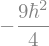

In [59]:
simplify( -hb**2*sqrt(2*b/pi)*(4*b**2*integrate(x**4*exp(-2*b*x**2),(x,-oo,oo)) 
                              -10*b*integrate(x**2*exp(-2*b*x**2),(x,-oo,oo))
                              +4*integrate(exp(-2*b*x**2),(x,-oo,oo))) )

Obtemos assim
\begin{align}
\langle H^{2}\rangle_{\phi} & = \frac{1}{4m^{2}}3b^{2}\hbar^{4} + \frac{m^{2}\omega^{4}}{4}\frac{3}{16b^{3/2}} + \frac{\omega^{2}}{4}\Big(-\frac{9\hbar^{2}}{4}+0\Big).
\end{align}
Com isso podemos calcular a variância e os limites inferior e superior, que estão mostrados na figura abaixo.

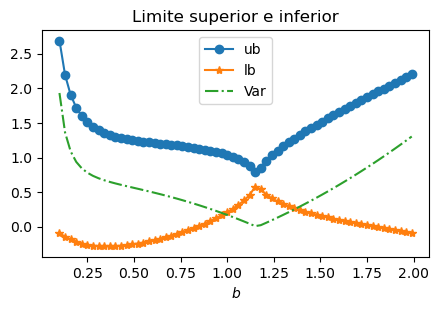

In [53]:
matplotlib.rcParams.update({'font.size':10}); plt.figure(figsize = (5,3), dpi = 100)
m = 1; w = 1; hbb = 1
b = np.arange(0.1,2,0.03); 
H2m = (3*b**2*hbb**4)/(4*m**2) + (3*m**2*w**4)/(64*b*(3/2)) - (9*w**2*hbb**2)/(16)
Hm = (b*hbb**2)/(2*m) + (m*w**2)/(8*b)
Var = abs(H2m - Hm**2)#; print(Var)
ub = Hm + np.sqrt(Var); lb = Hm - np.sqrt(Var)
plt.plot(b, ub,'-o',label='ub'); plt.plot(b, lb,'-*',label='lb'); plt.plot(b, Var,'-.',label='Var')
plt.legend()
plt.xlabel(r'$b$'); plt.title('Limite superior e inferior')
plt.show()

## O estado fundamental do átomo de Hélio $(He)$
O átomo de Hélio é constituído por 2 elétrons, 2 prótons e 2 nêutrons. Considerando somente energia cinética não relativística e energia potencial devido à interação coulombiana, e considerando o núcleo parado, o hamiltoniano deste átomo pode ser escrito como segue:
$$H = -\frac{\hbar^{2}}{2m_{e}}\big(\nabla_{1}^{2}+\nabla_{2}^{2}\big)-ke^{2}\Big(\frac{2}{r_{1}}+\frac{2}{r_{2}}-\frac{1}{||\vec{r}_{1}-\vec{r}_{2}||}\Big). $$
Nesta equação o índice $s=1,2$ refere-se ao elétron $1,2$.

Nosso problema é calcular teoricamente a energia do estado fundamental deste átomo. Essa energia é igual à energia necessária para arrancar os 2 elétrons do átomo, e o valor dessa energia é conhecido experimentalmente:
$$E_{0}^{exp} \approx -78.935\text{ eV}.$$

<img src='fig_He.png' width='250'>

A dificuldade em se resolver este problema se deve ao termo de repulsão elétron-elétron:
$$U_{ee} = \frac{ke^{2}}{||\vec{r}_{1}-\vec{r}_{2}||}.$$
Se ignoramos esse termo, o hamiltoniano fica escrito como
$$H_{i} = -\frac{\hbar^{2}}{2m_{e}}\nabla_{1}^{2}-\frac{2ke^{2}}{r_{1}}-\frac{\hbar^{2}}{2m_{e}}\nabla_{2}^{2}-\frac{2ke^{2}}{r_{2}} = H_{1}^{h}+H_{2}^{h},$$
que equivale à soma dos hamiltonianos de 2 átomos hidrogenóides independentes com número atômico $Z=2$. Seja $\psi_{nlm_{l}}^{(j)}$ a autofunção de $H_{j}^{h}$. Teremos assim que
$$H_{i}\psi_{nlm_{l}}^{(1)}\psi_{n'l'm_{l}'}^{(2)} = \big(E_{n}^{(0)}+E_{n'}^{(0)}\big)\psi_{nlm_{l}}^{(1)}\psi_{n'l'm_{l}'}^{(2)},$$
com
$$E_{n}^{(0)} = -\frac{m_{e} Z^{2}k^{2}e^{4}}{2\hbar^{2}}\frac{1}{n^{2}} = Z^{2}\Big(-\frac{m_{e}k^{2}e^{4}}{2\hbar^{2}}\Big)\frac{1}{n^{2}} = Z^{2}\frac{E_{1}^{(0)}}{n^{2}},$$
em que usamos 
$$E_{1}^{(0)} = -\frac{m_{e}k^{2}e^{4}}{2\hbar^{2}} = -\frac{ke^{2}}{2a_{0}}.$$
Com isso, para o estado fundamental teremos a seguinte aproximação para a energia (hamiltoniano de elétrons independentes):
$$E_{0}^{ei} = 2(2^{2})E_{1}^{(0)} \approx -108.85\text{ eV}.$$
Note, essa é só uma 1ª aproximação, sem uso do método variacional.

In [43]:
E10 = (-(me*k**2*e**4)/(2*hb**2))/e; E10, 2*2**2*(-(me*k**2*e**4)/(2*hb**2))/e

Para melhorar essa aproximação, ainda sem parâmetros variacionais, vamos usar como função de onda teste a autofunção de elétrons independentes:
$$\phi = \psi_{100}^{(1)}\psi_{100}^{(2)} = \frac{8}{\pi a_{0}^{3}}e^{-2(r_{1}+r_{2})/a_{0}},$$
em que usamos (https://github.com/jonasmaziero/mecanica_quantica_1900-1925/blob/master/16_hidrogenio.ipynb) $$\psi_{1,0,0}(r,\theta,\phi) = \left(\frac{Z^{3}}{\pi a_{0}^{3}}\right)^{1/2}e^{-Zr/a_{0}}.$$
Teremos assim que
$$\langle H\rangle_{\phi} = -108.85\text{ eV} + \langle U_{ee}\rangle,$$
em que
\begin{align}
\langle U_{ee}\rangle & = \iint d^{3}r_{1}d^{3}r_{2} U_{ee}|\phi|^{2} = ke^{2}\Big(\frac{8}{\pi a_{0}^{3}}\Big)^{2}\iint d^{3}r_{1}d^{3}r_{2} \frac{e^{-4(r_{1}+r_{2})/a_{0}}}{||\vec{r}_{1}-\vec{r}_{2}||} \\
&  = ke^{2}\Big(\frac{8}{\pi a_{0}^{3}}\Big)^{2}\int d^{3}r_{1}e^{-4r_{1}/a_{0}}\int d^{3}r_{2} \frac{e^{-4r_{2}/a_{0}}}{||\vec{r}_{1}-\vec{r}_{2}||}.
\end{align}

<img src='fig_He_referencial.png' width='300'>

Usemos 
\begin{align}
||\vec{r}_{1}-\vec{r}_{2}|| & = \sqrt{(\vec{r}_{1}-\vec{r}_{2})\cdot(\vec{r}_{1}-\vec{r}_{2})} = \sqrt{r_{1}^{2}+r_{2}^{2}-2\vec{r}_{1}\cdot\vec{r}_{2}} \\
& = \sqrt{r_{1}^{2}+r_{2}^{2}-2r_{1}r_{2}\cos\theta_{2}},
\end{align}
em que $\theta_{2}$ é o ângulo entre $\vec{r}_{1}$ e $\vec{r}_{2}$, para fazer primeiro a integral sobre o elétron 2:
\begin{align}
\int d^{3}r_{2} \frac{e^{-4r_{2}/a_{0}}}{||\vec{r}_{1}-\vec{r}_{2}||} & = \int_{0}^{\infty}\int_{0}^{\pi}\int_{0}^{2\pi} r_{2}^{2}\sin\theta_{2}dr_{2}d\theta_{2}d\phi_{2} \frac{e^{-4r_{2}/a_{0}}}{\sqrt{r_{1}^{2}+r_{2}^{2}-2r_{1}r_{2}\cos\theta_{2}}} \\
& = 2\pi\int_{0}^{\infty}dr_{2}r_{2}^{2}e^{-4r_{2}/a_{0}}\int_{0}^{\pi}\frac{d\theta_{2}\sin\theta_{2}}{\sqrt{r_{1}^{2}+r_{2}^{2}-2r_{1}r_{2}\cos\theta_{2}}} \\
& = 2\pi\int_{0}^{\infty}dr_{2}r_{2}^{2}e^{-4r_{2}/a_{0}}\int u^{-1/2}\frac{du}{2r_{1}r_{2}} \\
& = \frac{\pi}{r_{1}}\int_{0}^{\infty}dr_{2}r_{2}e^{-4r_{2}/a_{0}}\Big(\frac{u^{1/2}}{1/2}\Big) \\
& = \frac{2\pi}{r_{1}}\int_{0}^{\infty}dr_{2}r_{2}e^{-4r_{2}/a_{0}}\Big[\sqrt{r_{1}^{2}+r_{2}^{2}-2r_{1}r_{2}\cos\theta_{2}}\Big]_{0}^{\pi} \\
& = \frac{2\pi}{r_{1}}\int_{0}^{\infty}dr_{2}r_{2}e^{-4r_{2}/a_{0}}\Big(\sqrt{r_{1}^{2}+r_{2}^{2}+2r_{1}r_{2}} - \sqrt{r_{1}^{2}+r_{2}^{2}-2r_{1}r_{2}}\Big) \\
& = \frac{2\pi}{r_{1}}\int_{0}^{\infty}dr_{2}r_{2}e^{-4r_{2}/a_{0}}\Big(\sqrt{(r_{1}+r_{2})^{2}} - \sqrt{(r_{1}-r_{2})^{2}}\Big) \\
& = \frac{2\pi}{r_{1}}\int_{0}^{\infty}dr_{2}r_{2}e^{-4r_{2}/a_{0}}\big(r_{1}+r_{2} - |r_{1}-r_{2}|\big) \\
& = \frac{2\pi}{r_{1}}\int_{0}^{\infty}dr_{2}r_{2}e^{-4r_{2}/a_{0}}\times\begin{cases} 2r_{2} \text{ se } r_{1}\ge r_{2}, \\
2r_{1} \text{ se } r_{1}<r_{2},\end{cases} \\
& = \frac{4\pi}{r_{1}}\Big( \int_{0}^{r_{1}}dr_{2}r_{2}^{2}e^{-4r_{2}/a_{0}} + r_{1}\int_{r_{1}}^{\infty}dr_{2}r_{2}e^{-4r_{2}/a_{0}} \Big),
\end{align}
em que fizemos a mudança de variável $u = r_{1}^{2}+r_{2}^{2}-2r_{1}r_{2}\cos\theta_{2}\ \therefore\ du = 2r_{1}r_{2}\sin\theta_{2}d\theta_{2}$.

Faremos uso de integração por partes:
\begin{align}
\int xe^{-ax}dx = x\frac{e^{-ax}}{-a} - \int \frac{e^{-ax}}{-a}dx = -\frac{1}{a}\Big(x+\frac{1}{a}\Big)e^{-ax},
\end{align}
em que usamos $u=x\ \therefore\ du=dx$ e $dv = e^{-ax}dx\ \therefore\ v = \frac{e^{-ax}}{-a}$.

Também precisamos de
\begin{align}
\int x^{2}e^{-ax}dx & = x^{2}\frac{e^{-ax}}{-a} - \int \frac{e^{-ax}}{-a}2xdx = -\frac{1}{a}\Big(x^{2}e^{-ax} - 2\int xe^{-ax}dx\Big) \\
& = -\frac{1}{a}\Big(x^{2}e^{-ax} - 2(-1)\frac{1}{a}\Big(x+\frac{1}{a}\Big)e^{-ax}\Big) \\
& = -\frac{1}{a}\Big(x^{2} +\frac{2}{a}\Big(x+\frac{1}{a}\Big)\Big)e^{-ax},
\end{align}
em que usamos $u=x^{2}\ \therefore\ du=2xdx$ e $dv = e^{-ax}dx\ \therefore\ v = \frac{e^{-ax}}{-a}$.

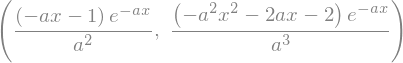

In [23]:
x = symbols('x'); a = symbols('a', positive=True)
integrate(x*exp(-a*x), x), integrate(x**2*exp(-a*x), x)

Assim 
\begin{align}
\int_{0}^{r_{1}}dr_{2}r_{2}^{2}e^{-4r_{2}/a_{0}} & = \Big[-\frac{a_{0}}{4}\Big(r_{2}^{2} +\frac{2a_{0}}{4}\Big(r_{2}+\frac{a_{0}}{4}\Big)\Big)e^{-4r_{2}/a_{0}}\Big]_{0}^{r_{1}} \\
& = -\frac{a_{0}}{4}\Big(r_{1}^{2} +\frac{2a_{0}}{4}\Big(r_{1}+\frac{a_{0}}{4}\Big)\Big)e^{-4r_{1}/a_{0}} + \frac{a_{0}}{4}\Big(0^{2} +\frac{2a_{0}}{4}\Big(0+\frac{a_{0}}{4}\Big)\Big)e^{-40/a_{0}} \\
& = -\frac{a_{0}}{4}\Big(r_{1}^{2} +\frac{a_{0}}{2}\Big(r_{1}+\frac{a_{0}}{4}\Big)\Big)e^{-4r_{1}/a_{0}} + \frac{a_{0}^{3}}{32}
\end{align}
e 
\begin{align}
\int_{r_{1}}^{\infty}dr_{2}r_{2}e^{-4r_{2}/a_{0}} & = \Big[ -\frac{a_{0}}{4}\Big(r_{2}+\frac{a_{0}}{4}\Big)e^{-4r_{2}/a_{0}}\Big]_{r_{1}}^{\infty} \\
& = 0 + \frac{a_{0}}{4}\Big(r_{1}+\frac{a_{0}}{4}\Big)e^{-4r_{1}/a_{0}}.
\end{align}
Por conseguinte
\begin{align}
\int d^{3}r_{2} \frac{e^{-4r_{2}/a_{0}}}{||\vec{r}_{1}-\vec{r}_{2}||} & = \frac{4\pi}{r_{1}}\Big( -\frac{a_{0}}{4}\Big(r_{1}^{2} +\frac{a_{0}}{2}\Big(r_{1}+\frac{a_{0}}{4}\Big)\Big)e^{-4r_{1}/a_{0}} + \frac{a_{0}^{3}}{32} + r_{1}\frac{a_{0}}{4}\Big(r_{1}+\frac{a_{0}}{4}\Big)e^{-4r_{1}/a_{0}} \Big) \\
& = \frac{\pi a_{0}^{3}}{8r_{1}}\Big(1 -\frac{32}{a_{0}^{3}}\frac{a_{0}}{4}\Big(r_{1}^{2} +\frac{a_{0}}{2}\Big(r_{1}+\frac{a_{0}}{4}\Big)-r_{1}^{2} - \frac{a_{0}r_{1}}{4}\Big)e^{-4r_{1}/a_{0}} \Big) \\
& = \frac{\pi a_{0}^{3}}{8r_{1}}\Big(1 -\frac{8}{a_{0}^{2}}\frac{a_{0}}{2}\Big(\frac{r_{1}}{2}+\frac{a_{0}}{4}\Big)e^{-4r_{1}/a_{0}} \Big) \\
& = \frac{\pi a_{0}^{3}}{8r_{1}}\Big(1 -\Big(\frac{2r_{1}}{a_{0}}+1\Big)e^{-4r_{1}/a_{0}} \Big).
\end{align}

Com isso, podemos voltar ao cálculo do valor médio da interação elétron-elétron
\begin{align}
\langle U_{ee}\rangle & = ke^{2}\Big(\frac{8}{\pi a_{0}^{3}}\Big)^{2}\int d^{3}r_{1}e^{-4r_{1}/a_{0}}\frac{\pi a_{0}^{3}}{8r_{1}}\Big(1 -\Big(\frac{2r_{1}}{a_{0}}+1\Big)e^{-4r_{1}/a_{0}} \Big) \\
& = ke^{2}\frac{8}{\pi a_{0}^{3}}\int_{0}^{2\pi}d\phi_{1}\int_{0}^{\pi}\sin\theta_{1}d\theta_{1}\int_{0}^{\infty}r_{1}^{2}dr_{1}e^{-4r_{1}/a_{0}}\frac{1}{r_{1}}\Big(1 -\Big(\frac{2r_{1}}{a_{0}}+1\Big)e^{-4r_{1}/a_{0}} \Big) \\
& = ke^{2}\frac{8}{\pi a_{0}^{3}}4\pi\int_{0}^{\infty}dr_{1}\Big(r_{1}e^{-4r_{1}/a_{0}} -\Big(\frac{2r_{1}^{2}}{a_{0}}+r_{1}\Big)e^{-8r_{1}/a_{0}} \Big) \\
& = \frac{32ke^{2}}{a_{0}^{3}}\Big(\Big[-\frac{a_{0}}{4}\Big(r_{1}+\frac{a_{0}}{4}\Big)e^{-4r_{1}/a_{0}}\Big]_{0}^{\infty} -\frac{2}{a_{0}}\Big[-\frac{a_{0}}{8}\Big(r_{1}^{2} +\frac{2a_{0}}{8}\Big(r_{1}+\frac{a_{0}}{8}\Big)\Big)e^{-8r_{1}/a_{0}}\Big]_{0}^{\infty} \\
& \hspace{2.2cm} - \Big[-\frac{a_{0}}{8}\Big(r_{1}+\frac{a_{0}}{8}\Big)e^{-8r_{1}/a_{0}}\Big]_{0}^{\infty}\Big) \\
& = \frac{2^{5}ke^{2}}{a_{0}^{3}}\Big(0+\frac{a_{0}^{2}}{2^{4}} -\frac{2}{a_{0}}\Big(0+\frac{a_{0}^{3}}{2^{8}}\Big) - \Big(0+\frac{a_{0}^{2}}{2^{6}}\Big)\Big) \\
& = \frac{2^{5}ke^{2}}{a_{0}}\frac{2^{3}-1-2^{1}}{2^{7}}  = \frac{5ke^{2}}{4a_{0}} \\
& \approx 34.01 \text{ eV}.
\end{align}

In [28]:
((5*k*e**2)/(4*a0))/e, -108.85+34.01

Com isso, temos que o limite superior para a energia do estado fundamental do átomo de Hélio estimada usando como função de onda teste o produto das funções de onda dos elétrons independentes:
\begin{align}
\langle H\rangle_{\phi} & \approx -108.85\text{ eV} + 34.01 \text{ eV} \\
& = -74.84\text{ eV},
\end{align}
que está razoavelmente próximo do valor experimental, que é $E_{0}^{exp} \approx -78.935\text{ eV}.$

Podemos, claro, melhorar este resultado. Notemos que ainda não fizemos nenhuma optimização sobre parâmetros variacionais. Uma dica sobre que parâmetro é esse pode ser obtida notando-se que estamos usando uma "imagem" clássica de elétrons pontuais, quando na verdade eles são objetos quânticos espalhados no espaço. Esse espraiamento faz com que um elétron blinde o núcleo, fazendo com que o outro elétron interaja efetivamente com menos que $Z$ prótons. Para incluir esse efeito, vamos usar a função de onda teste
\begin{align}
\phi & = \psi_{1,0,0}(r_{1},\theta_{1},\phi_{1})\psi_{1,0,0}(r_{2},\theta_{2},\phi_{2}) \\
& = \frac{Z^{3}}{\pi a_{0}^{3}}e^{-Z(r_{1}+r_{2})/a_{0}} = \phi(r_{1},r_{2},Z). \hspace{1cm} (*)
\end{align}
Como no método variacional não modificamos o Hamiltoniano do sistema, para utilizar os resultados conhecidos, vamos reescrever o Hamiltoniano do átomo de Hélio como segue
$$H = -\frac{\hbar^{2}}{2m_{e}}\big(\nabla_{1}^{2}+\nabla_{2}^{2}\big)-ke^{2}\Big(\frac{Z}{r_{1}}+\frac{Z}{r_{2}}\Big) + ke^{2}\Big(\frac{Z-2}{r_{1}}+\frac{Z-2}{r_{2}}+\frac{1}{||\vec{r}_{1}-\vec{r}_{2}||}\Big). \hspace{1cm} (\star)$$

Os 2 primeiros termos correspondem à soma de Hamiltonianos de 2 átomos hidrogenóides com nº atômico $Z$. Assim, pela forma da função de onda teste, pode-se verificar que
\begin{align}
\langle H\rangle_{\phi} & = 2Z^{2}E_{1}^{(0)} + 2ke^{2}(Z-2)\Big\langle\frac{1}{r}\Big\rangle_{\psi_{100}} + \langle U_{ee}\rangle_{\phi} \\
& = 2Z^{2}E_{1}^{(0)} + 2ke^{2}(Z-2)\frac{Z}{a_{0}} + \frac{Z}{2}\frac{5ke^{2}}{4a_{0}}  \hspace{1cm} (\diamond) \\
& = 2Z^{2}E_{1}^{(0)} + 4(Z^{2}-2Z)\frac{ke^{2}}{2a_{0}} + \frac{5Z}{4}\frac{ke^{2}}{2a_{0}} \\
& = \Big(2Z^{2} - 4(Z^{2}-2Z) - \frac{5Z}{4}\Big)E_{1}^{(0)} \\
& = \Big(-2Z^{2} + (8-5/4)Z\Big)E_{1}^{(0)}.
\end{align}

Obtemos o parâmetro variacional ótimo de
\begin{align}
& \partial_{Z}\langle H\rangle_{\phi} = 0 \ \therefore\ \big(-4Z_{opt}+(8-5/4)\big)E_{1}^{(0)}=0 \\
& \therefore\ Z_{opt} = \frac{8-5/4}{4} = 1.6875.
\end{align}

Usando este valor de $Z$, teremos a seguinte estimativa variacional para a energia do estado fundamental do átomo de Hélio:
$$\langle H\rangle_{\phi} \approx -77.49\text{ eV},$$
que está ainda mais próxima do valor experimental $E_{0}^{exp} \approx -78.935\text{ eV}.$

Pode-se continuar melhorando esse resultado pela adição de mais parâmetros variacionais na função de onda teste, como já foi feito na literatura.

In [41]:
Z = (8-5/4)/4; Z

In [44]:
(-2*Z**2 + (8-5/4)*Z)*E10

## Íon da molécula de hidrogênio $(H_{2}^{+})$

Neste caso temos um sistema quântico constituído por 2 prótons e 1 elétron. Consideremos que os 2 prótons estão fixos a uma distância $R$ um do outro. Um os dos principais produtos do nosso cálculo será obter uma estimativa para o valor de $R$. Teremos assim que o hamiltoniano desse sistema será
$$H = -\frac{\hbar^{2}}{2m_{e}}\nabla^{2} -ke^{2}\Big(\frac{1}{r_{1}}+\frac{1}{r_{2}}\Big).$$
A energia de repulsão entre os prótons, $ke^{2}/R$, pode ser incluída depois que obtermos $R$, que por enquanto será considerado fixo. 

<img src='fig_H2+.png' width='250'>

Se ignoramos um dos prótons, a função de onda é aquela do átomo de hidrogênio. Para o estado fundamental
$$\psi_{0}(r) = \frac{1}{\sqrt{\pi a_{0}^{3}}}e^{-r/a_{0}}.$$

Assim, como uma 1ª tentativa de função de onda variacional, podemos usar
$$\phi = A\big(\psi_{0}(r_{1})+\psi_{0}(r_{2})\big).$$
Esse tipo de função de onda molecular é usualmente chamado de CLOA, que a sigla para Combinação Linear de Orbitais Atômicos (__LCAO__, que é a sigla para Linear Combination of Atomic Orbitals). Pela simetria do sistema por troca dos prótons, temos que os módulos dos coeficientes na combinação linear devem ser iguais. Usaremos o sinal de mais, que leva a um estado ligado. Ficará como exercício mostrar que o uso do sinal de menos leva a um estado não ligado.

In [14]:
r, a0 = symbols('r a_{0}', positive=True)
integrate(r**2*(1/(pi*a0**3))*exp(-2*r/a0),(r,0,oo))*4*pi # ok psi0 esta normalizada

Normalizando
\begin{align}
& \int d^{3}r |\phi|^{2} = 1 = |A|^{2}\int d^{3}r\big(|\psi_{0}(r_{1})|^{2}+|\psi_{0}(r_{2})|^{2}+2\psi_{0}(r_{1})\psi_{0}(r_{2})\big) \\
& = |A|^{2}\Big(1+1+\frac{2}{\pi a_{0}^{3}}\int d^{3}r e^{-(r_{1}+r_{2})/a_{0}}\big) =: |A|^{2}2(1+I), \\
& \therefore A = \frac{1}{\sqrt{2(1+I)}}.
\end{align}

<img src='fig_H2+_ref1.png' width='300'>

Seguindo, escolhemos o referencial de forma que o próton 1 está na orgigem e o próton 2 está no eixo positivo $z$. Teremos assim que
$$r_{1}=r \text{ e } r_{2} =r'= \sqrt{r^{2}+R^{2}-2rR\cos\theta},$$
em que $\theta$ é o ângulo entre $\vec{r}$ e o eixo $z$ ($\hat{k}$). Com isso, teremos que a chamada __integral de sobreposição__ (de _overlap_) é
\begin{align}
I & = \langle\psi_{0}(r_{1})|\psi_{0}(r_{2})\rangle = \int d^{3}r \psi_{0}(r_{1})^{*}\psi_{0}(r_{2})\\
& = \frac{1}{\pi a_{0}^{3}}\int d^{3}r e^{-(r_{1}+r_{2})/a_{0}} = \int_{0}^{\infty}r^{2}dr\int_{0}^{\pi}\sin\theta d\theta e^{-\big(r+\sqrt{r^{2}+R^{2}-2rR\cos\theta}\big)/a_{0}}\int_{0}^{2\pi}d\phi \\
& = 2\pi\frac{1}{\pi a_{0}^{3}}\int_{0}^{\infty}r^{2}e^{-r/a_{0}}dr\int_{0}^{\pi}\sin\theta d\theta e^{-\sqrt{r^{2}+R^{2}-2rR\cos\theta}/a_{0}}.
\end{align}

Seguindo, fazemos a seguinte mudança de variável
\begin{align}
& y = \sqrt{r^{2}+R^{2}-2rR\cos\theta}/a_{0} \ \therefore\ a_{0}^{2}y^{2} = r^{2}+R^{2}-2rR\cos\theta \\
& \therefore\ a_{0}^{2}d(y^{2}) = a_{0}^{2}2ydy = 2rR\sin\theta d\theta \ \therefore\ \sin\theta d\theta =  \frac{a_{0}^{2}ydy}{rR}; \\
& \begin{cases} \theta = 0 \ \therefore\ y = \sqrt{(r-R)^{2}}/a_{0} = |r-R|/a_{0}, \\ \theta = \pi \ \therefore\ y = \sqrt{(r+R)^{2}}/a_{0} = (r+R)/a_{0} \end{cases}.
\end{align}

Assim
\begin{align}
I & = \frac{1}{\pi a_{0}^{3}}2\pi\int_{0}^{\infty}r^{2}e^{-r/a_{0}}dr\int_{|r-R|/a_{0}}^{(r+R)/a_{0}}\frac{a_{0}^{2}ydy}{rR}e^{-y} \\
& = \frac{1}{\pi a_{0}^{3}}\frac{2\pi a_{0}^{2}}{R}\int_{0}^{\infty}re^{-r/a_{0}}dr\int_{|r-R|/a_{0}}^{(r+R)/a_{0}}ye^{-y}dy \\
& = \frac{1}{\pi a_{0}^{3}}\frac{2\pi a_{0}^{2}}{R}\int_{0}^{\infty}re^{-r/a_{0}}dr\Big(\big[-ye^{-y}\big]_{|r-R|/a_{0}}^{(r+R)/a_{0}} - \int_{|r-R|/a_{0}}^{(r+R)/a_{0}}(-e^{-y})dy\Big) \\
& = \frac{1}{\pi a_{0}^{3}}\frac{2\pi a_{0}^{2}}{R}\int_{0}^{\infty}re^{-r/a_{0}}dr\Big(-\frac{r+R}{a_{0}}e^{-(r+R)/a_{0}}+\frac{|r-R|}{a_{0}}e^{-|r-R|/a_{0}} -e^{-(r+R)/a_{0}} + e^{-|r-R|/a_{0}}\Big) \\
& = \frac{1}{\pi a_{0}^{3}}\frac{2\pi a_{0}}{R}\int_{0}^{\infty}re^{-r/a_{0}}dr\Big(-\big(r+R+a_{0}\big)e^{-(r+R)/a_{0}}+\big(|r-R|+a_{0}\big)e^{-|r-R|/a_{0}}\Big) \\
& = \frac{1}{\pi a_{0}^{3}}\frac{2\pi a_{0}}{R}\int_{0}^{\infty}dr\Big(-\big(r^{2}+(R+a_{0})r\big)e^{-(2r+R)/a_{0}}+\big(r|r-R|+a_{0}r\big)e^{-(r+|r-R|)/a_{0}}\Big) \\
& = -\frac{1}{\pi a_{0}^{3}}\frac{2\pi a_{0}}{R}\Big(\int_{0}^{\infty}r^{2}e^{-(2r+R)/a_{0}}dr + (R+a_{0})\int_{0}^{\infty}re^{-(2r+R)/a_{0}}dr \\
& \hspace{2cm} - \int_{0}^{R}\big(r|r-R|+a_{0}r\big)e^{-(r+|r-R|)/a_{0}} - \int_{R}^{\infty}\big(r|r-R|+a_{0}r\big)e^{-(r+|r-R|)/a_{0}}\Big) \\
& = -\frac{1}{\pi a_{0}^{3}}\frac{2\pi a_{0}}{R}\Big(\frac{a_{0}^{3}e^{-R/a_{0}}}{4} + \frac{(R+a_{0})a_{0}^{2}e^{-R/a_{0}}}{4} - \int_{0}^{R}\big(r(R-r)+a_{0}r\big)e^{-(r+R-r)/a_{0}} \\
& \hspace{2cm} - \int_{R}^{\infty}\big(r(r-R)+a_{0}r\big)e^{-(r+r-R)/a_{0}}\Big) \\
& = -\frac{1}{\pi a_{0}^{3}}\frac{2\pi a_{0}}{R}\Big(\frac{a_{0}^{3}e^{-R/a_{0}}}{4} + \frac{(R+a_{0})a_{0}^{2}e^{-R/a_{0}}}{4} - \frac{R^{2}(R+3a_{0})}{6} - \frac{a_{0}^{2}(3R+2a_{0})e^{-R/a_{0}}}{4}\Big) \\
& = \frac{1}{\pi a_{0}^{3}}\pi a_{0}^{3}\big(R^{2}/3a_{0}^{2} + R/a_{0}+1\big)e^{-R/a_{0}} \\
& = \big(R^{2}/3a_{0}^{2} + R/a_{0}+1\big)e^{-R/a_{0}},
\end{align}
em que usamos integração por partes: $u=y\ \therefore\ du=dy$ e $dv=e^{-y}dy\ \therefore\ v = -e^{-y}$. Também usamos as integrais abaixo.

In [19]:
A0,r,R = symbols('a_{0} r R', positive=True)

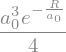

In [12]:
I1 = integrate(r**2*exp(-(2*r+R)/A0),(r,0,oo)); simplify(I1)

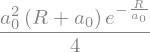

In [19]:
I2 = (R+A0)*integrate(r*exp(-(2*r+R)/A0),(r,0,oo)); simplify(I2)

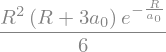

In [21]:
I3 = integrate((r*(R-r)+A0*r)*exp(-R/A0),(r,0,R)); simplify(I3)

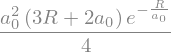

In [15]:
I4 = integrate((r*(r-R)+A0*r)*exp(-(2*r-R)/A0),(r,R,oo)); simplify(I4)

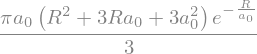

In [22]:
simplify(-((2*pi*A0)/R)*(I1+I2-I3-I4))

Tendo a integral de overlap, obtemos a constante de normalização e a função de onda teste
\begin{align}
& A = \frac{1}{\sqrt{2(1+I)}} = \frac{1}{\sqrt{2\big(1+\big(R^{2}/3a_{0}^{2} + R/a_{0}+1\big)e^{-R/a_{0}}\big)}}, \\
& \phi = \frac{\psi_{0}(r_{1})+\psi_{0}(r_{2})}{\sqrt{2\big(1+\big(R^{2}/3a_{0}^{2} + R/a_{0}+1\big)e^{-R/a_{0}}\big)}}.
\end{align}

Seguindo, vamos usar
$$\Big(-\frac{\hbar^{2}}{2m_{e}}\nabla^{2}-\frac{ke^{2}}{r}\Big)\psi_{0}(r)=E_{1}^{(0)}\psi_{0}(r).$$
Com isso, vem que
\begin{align}
H\phi & = \Big(-\frac{\hbar^{2}}{2m_{e}}\nabla^{2}-\frac{ke^{2}}{r}-\frac{ke^{2}}{r_{2}}\Big)A\big(\psi_{0}(r)+\psi_{0}(r_{2})\big) \\
& = A\Big(\Big(-\frac{\hbar^{2}}{2m_{e}}\nabla^{2}-\frac{ke^{2}}{r}\Big)\psi_{0}(r) + \Big(-\frac{\hbar^{2}}{2m_{e}}\nabla^{2}-\frac{ke^{2}}{r_{2}}\Big)\psi_{0}(r_{2}) - ke^{2}\Big(\frac{\psi_{0}(r)}{r_{2}}+\frac{\psi_{0}(r_{2})}{r}\Big)\Big) \\
& = A\Big(E_{1}^{(0)}\psi_{0}(r) + E_{1}^{(0)}\psi_{0}(r_{2}) - ke^{2}\Big(\frac{\psi_{0}(r)}{r_{2}}+\frac{\psi_{0}(r_{2})}{r}\Big)\Big) \\
& = E_{1}^{(0)}\phi - Ake^{2}\Big(\frac{\psi_{0}(r)}{r_{2}}+\frac{\psi_{0}(r_{2})}{r}\Big)\Big).
\end{align}

Assim
\begin{align}
\langle H\rangle_{\phi} & = \int d^{3}r \phi^{*}H\phi \\
& = E_{1}^{(0)}\int d^{3}r|\phi|^{2} - |A|^{2}ke^{2}\int d^{3}r \big(\psi_{0}(r)^{*}+\psi_{0}(r_{2})^{*}\big)\Big(\frac{\psi_{0}(r)}{r_{2}}+\frac{\psi_{0}(r_{2})}{r}\Big) \\
& = E_{1}^{(0)} - A^{2}ke^{2}\Big(\int d^{3}r \psi_{0}(r)\frac{1}{r_{2}}\psi_{0}(r) + \int d^{3}r \psi_{0}(r)\frac{1}{r}\psi_{0}(r_{2}) \\
& \hspace{3cm} + \int d^{3}r \psi_{0}(r_{2})\frac{1}{r_{2}}\psi_{0}(r) + \int d^{3}r \psi_{0}(r_{2})\frac{1}{r}\psi_{0}(r_{2}) \Big) \\
& = E_{1}^{(0)} - 2A^{2}ke^{2}\Big(\int d^{3}r \psi_{0}(r)\frac{1}{r_{2}}\psi_{0}(r) + \int d^{3}r \psi_{0}(r)\frac{1}{r}\psi_{0}(r_{2}) \Big) \\
& = E_{1}^{(0)} - 2A^{2}ke^{2}(I_{D} + I_{T}).
\end{align}
Passemos agora para o cálculo da chamada __integral direta__
\begin{align}
I_{D} & = \int d^{3}r \psi_{0}(r)\frac{1}{r_{2}}\psi_{0}(r) \equiv \langle\psi_{0}|\Big(\int d^{3}r \frac{|\vec{r}\rangle\langle \vec{r}|}{r_{2}}\Big)|\psi_{0}\rangle \\
& = \frac{1}{\pi a_{0}^{3}}\int_{0}^{2\pi}d\phi\int_{0}^{\infty}r^{2}e^{-2r/a_{0}}dr\int_{0}^{\pi}\frac{\sin\theta d\theta}{ \sqrt{r^{2}+R^{2}-2rR\cos\theta}} \\
& = \frac{1}{\pi a_{0}^{3}}2\pi\int_{0}^{\infty}r^{2}e^{-2r/a_{0}}dr\frac{1}{rR}\big(r+R-|r-R|\big) \\
& = \frac{2}{R a_{0}^{3}}\Big(\int_{0}^{R}re^{-2r/a_{0}}dr2r + \int_{R}^{\infty}re^{-2r/a_{0}}dr2R \Big) \\\
& = \frac{2}{R a_{0}^{3}}\frac{a_{0}^{3}\big(1 - \big(1+R/a_{0}\big)e^{-2R/a_{0}}\big)}{2} \\
& = \frac{1}{R} - \Big(\frac{1}{R} + \frac{1}{a_{0}}\Big)e^{-2R/a_{0}}.
\end{align}

In [20]:
th = symbols('theta')

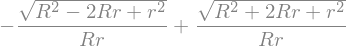

In [22]:
integrate(sin(th)/sqrt(r**2+R**2-2*r*R*cos(th)),(th,0,pi))

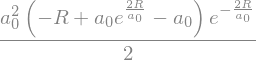

In [25]:
simplify(2*integrate(r**2*exp(-2*r/A0),(r,0,R)) + 2*R*integrate(r*exp(-2*r/A0),(r,R,oo)))

Já a chamada __integral de troca__ é obtida como segue
\begin{align}
I_{T} & = \int d^{3}r \psi_{0}(r)\frac{1}{r}\psi_{0}(r_{2})  \equiv \langle\psi_{0}|\Big(\int d^{3}r \frac{|\vec{r}\rangle\langle \vec{r}_{2}|}{r}\Big)|\psi_{0}\rangle \\
& = \frac{1}{\pi a_{0}^{3}}\int_{0}^{2\pi}d\phi\int_{0}^{\infty}\frac{r^{2}e^{-r/a_{0}}}{r}dr\int_{0}^{\pi} e^{-\sqrt{r^{2}+R^{2}-2rR\cos\theta}/a_{0}} \sin\theta d\theta \\
& = \frac{1}{\pi a_{0}^{3}}2\pi\int_{0}^{\infty}re^{-r/a_{0}}dr\int_{|r-R|/a_{a}}^{(r+R)/a_{0}} e^{-y} \frac{a_{0}^{2}ydy}{rR} \\
& = \frac{2}{R a_{0}}\int_{0}^{\infty}e^{-r/a_{0}}dr\Big(-\big(1+y\big)e^{-y}\Big)_{|r-R|/a_{0}}^{(r+R)/a_{0}} \\
& = \frac{2}{R a_{0}}\int_{0}^{\infty}e^{-r/a_{0}}dr\Big(-\big(1+(r+R)/a_{0}\big)e^{-(r+R)/a_{0}} + \big(1+|r-R|/a_{a}\big)e^{-|r-R|/a_{0}}\Big) \\
& = \frac{2}{R a_{0}}\Big(-\int_{0}^{\infty}e^{-r/a_{0}}dr\big(1+(r+R)/a_{0}\big)e^{-(r+R)/a_{0}} + \int_{0}^{R}e^{-r/a_{0}}dr\big(1+(R-r)/a_{a}\big)e^{-(R-r)/a_{0}} \\ 
& \hspace{2cm} + \int_{R}^{\infty}e^{-r/a_{0}}dr\big(1+(r-R)/a_{0}\big)e^{-(r-R)/a_{0}}\Big) \\
& = \frac{2}{R a_{0}}\Big(-\int_{0}^{\infty}dr\big(1+(r+R)/a_{0}\big)e^{-(2r+R)/a_{0}} + \int_{0}^{R}dr\big(1+(R-r)/a_{0}\big)e^{-R/a_{0}} \\ 
& \hspace{2cm} + \int_{R}^{\infty}dr\big(1+(r-R)/a_{0}\big)e^{-(2r-R)/a_{0}}\Big) \\
& = \frac{2}{R a_{0}}\frac{R(R+a_{0})e^{-R/a_{0}}}{2a_{0}} \\
& = \frac{1}{a_{0}}\Big(1+\frac{R}{a_{0}}\Big)e^{-R/a_{0}},
\end{align}
em que fizemos novamente a troca de variável $y=\sqrt{r^{2}+R^{2}-2rR\cos\theta}/a_{0}\ \therefore\ d(y^{2}) = 2ydy=2rR\sin\theta d\theta/a_{0}^{2}$.

In [30]:
y = symbols('y'); integrate(y*exp(-y))

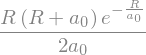

In [38]:
simplify(-integrate((1+(r+R)/A0)*exp(-(2*r+R)/A0),(r,0,oo)) + integrate((1+(R-r)/A0)*exp(-R/A0),(r,0,R)) 
        + integrate((1+(r-R)/A0)*exp(-(2*r-R)/A0),(r,R,oo)))

Temos assim que
\begin{align}
\langle H\rangle_{\phi} & = E_{1}^{(0)} - 2A^{2}ke^{2}(I_{D} + I_{T}) \\
& = E_{1}^{(0)} - 2\frac{1}{2\big(1+\big(R^{2}/3a_{0}^{2} + R/a_{0}+1\big)e^{-R/a_{0}}\big)}ke^{2}\Big(\frac{1}{R} - \Big( \frac{1}{R} + \frac{1}{a_{0}}\Big)e^{-2R/a_{0}} + \frac{1}{a_{0}}\Big(1+\frac{R}{a_{0}}\Big)e^{-R/a_{0}} \Big).
\end{align}

Para obter a _energia total_, $E$, incluímos também a energia coulombiana de interação próton-próton:
\begin{align}
U_{pp} & = \frac{ke^{2}}{R} = \frac{ke^{2}}{R}\frac{E_{1}^{(0)}}{E_{1}^{(0)}} = -\frac{ke^{2}}{R}\frac{2a_{0}}{ke^{2}}E_{1}^{(0)} = -\frac{2a_{0}}{R}E_{1}^{(0)},
\end{align}
em que usamos $E_{1}^{(0)} = -\frac{m_{e}k^{2}e^{4}}{2\hbar^{2}} = -\frac{ke^{2}}{2a_{0}}$. 

Assim
\begin{align}
\langle H_{t}\rangle_{\phi} & = \langle H\rangle_{\phi} + U_{pp} \\
& = E_{1}^{(0)} - \frac{1}{\big(1+\big(R^{2}/3a_{0}^{2} + R/a_{0}+1\big)e^{-R/a_{0}}\big)}ke^{2}\Big(\frac{1}{R} - \Big( \frac{1}{R} + \frac{1}{a_{0}}\Big)e^{-2R/a_{0}} + \frac{1}{a_{0}}\Big(1+\frac{R}{a_{0}}\Big)e^{-R/a_{0}} \Big) -\frac{2a_{0}}{R}E_{1}^{(0)} \\
& = E_{1}^{(0)}\Big(1-\frac{2a_{0}}{R}\Big) - \frac{1}{\big(1+\big(R^{2}/3a_{0}^{2} + R/a_{0}+1\big)e^{-R/a_{0}}\big)}\frac{ke^{2}}{R}\Big(1 - \Big(1 + \frac{R}{a_{0}}\Big)e^{-2R/a_{0}} + \frac{R}{a_{0}}\Big(1+\frac{R}{a_{0}}\Big)e^{-R/a_{0}} \Big) \\
& = E_{1}^{(0)}\Big(1-\frac{2a_{0}}{R}\Big) - \frac{1}{\big(1+\big(R^{2}/3a_{0}^{2} + R/a_{0}+1\big)e^{-R/a_{0}}\big)}\frac{-2a_{0}}{R}E_{1}^{(0)}\Big(1 - \Big(1 + \frac{R}{a_{0}}\Big)e^{-2R/a_{0}} + \frac{R}{a_{0}}\Big(1+\frac{R}{a_{0}}\Big)e^{-R/a_{0}} \Big) \\
& = -E_{1}^{(0)}\Big(-1+\frac{2}{x} - \frac{2}{x}\frac{1 - (1 + x)e^{-2x} + x(1+x)e^{-x}}{1+\big(x^{2}/3 + x+1\big)e^{-x}}\Big) \\
& = -E_{1}^{(0)}\Big(-1+\frac{2}{x}\Big( 1 - \frac{1 - (1 + x)e^{-2x} + x(1+x)e^{-x}}{1+\big(x^{2}/3 + x+1\big)e^{-x}}\Big)\Big) \\
& = -E_{1}^{(0)}\Big(-1+\frac{2}{x}\Big(\frac{1+\big(x^{2}/3 + x+1\big)e^{-x} -1 + (1 + x)e^{-2x} - x(1+x)e^{-x}}{1+\big(x^{2}/3 + x+1\big)e^{-x}}\Big)\Big) \\
& = -E_{1}^{(0)}\Big(-1+\frac{2}{x}\Big(\frac{(1-2x^{2}/3)e^{-x}+ (1 + x)e^{-2x}}{1+\big(x^{2}/3 + x+1\big)e^{-x}}\Big)\Big) \\
& = -E_{1}^{(0)}f(x),
\end{align}
em que definimos $$x:=\frac{R}{a_{0}}.$$

In [6]:
def Htm(x): # em unidade de -E_1^0
    return -1 + (2*x**-1)*(((1-2*x**2/3)*np.exp(-x)+(1+x)*np.exp(-2*x))/(1+(1+x+x**2/3)*np.exp(-x)))

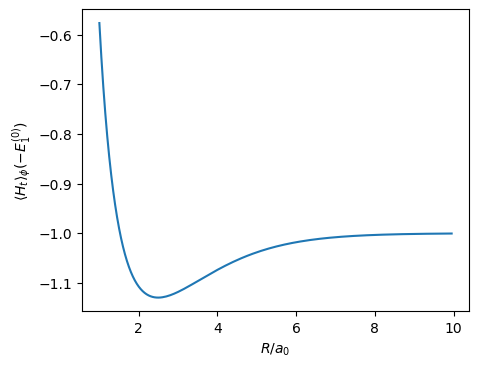

In [9]:
matplotlib.rcParams.update({'font.size':10}); plt.figure(figsize = (5,4), dpi = 100)
x = np.arange(1,10,0.05)
y = Htm(x)
plt.plot(x,y)
plt.ylabel(r'$\langle H_{t}\rangle_{\phi}(-E_{1}^{(0)})$'); plt.xlabel(r'$R/a_{0}$'); plt.show()

Vemos assim que existe um estado ligado para o íon da molécula de hidrogênio, pois a energia tem um mínimo menor que $-E_{1}^{(0)}$, que é a energia de um átomo de hidrogênio mais um próton livre. Funções de onda teste melhores nos fornecerão energias de ligação ainda menores. Note que aqui o parâmetro variacional é $R$, a distância entre os prótons. Na sequência obteremos o valor de $R$ que minimiza $\langle H_{t}\rangle_{\phi}$. Com a ajuda do código abaixo, vemos que
$$R_{opt} \approx 2.49a_{0} \approx 1.32\ \overset{\circ}{A}.$$
O valor experimental é
$$R_{exp} = 1.06\ \overset{\circ}{A}.$$

A energia de ligação, que é a diferença da energia da molécula de hidrogêncio ionizada, que estamos limitando superiormente por $\langle H_{t}\rangle$, e a energia de um átomo de hidrogênio mais um próton livre, que é $E_{1}^{0}$:
\begin{align}
E_{lig} & = E_{(p+e)+p} - E_{(2p+e)} \approx -13.6\text{ eV} + 15.37\text{ eV} \\
& \approx 1.76\text{ eV},
\end{align}
enquanto que o valor experimental é
$$E_{lig}^{exp} \approx 2.8\text{ eV}.$$

In [28]:
x = symbols('x')
Htm_ = -1 + (2*x**-1)*(((1-2*x**2/3)*exp(-x)+(1+x)*exp(-2*x))/(1+(1+x+x**2/3)*exp(-x)))
dHtm = diff(Htm_,x,1); print(simplify(dHtm))

2*(x**2*(x + 1)*(3*x + (3 - 2*x**2)*exp(x) + 3) + x*(-6*x + (2*x**2 - 4*x - 3)*exp(x) - 3)*(x**2 + 3*x + 3*exp(x) + 3) + (-3*x + (2*x**2 - 3)*exp(x) - 3)*(x**2 + 3*x + 3*exp(x) + 3))*exp(-x)/(x**2*(x**2 + 3*x + 3*exp(x) + 3)**2)


In [26]:
def dHtm(x):
    der = 2*(x**2*(x + 1)*(3*x + (3 - 2*x**2)*np.exp(x) + 3) 
            + x*(-6*x + (2*x**2 - 4*x - 3)*np.exp(x) - 3)*(x**2 + 3*x + 3*np.exp(x) + 3) 
            + (-3*x + (2*x**2 - 3)*np.exp(x) - 3)*(x**2 + 3*x + 3*np.exp(x) + 3))*np.exp(-x)/(x**2*(x**2 + 3*x + 3*np.exp(x) + 3)**2)
    return der

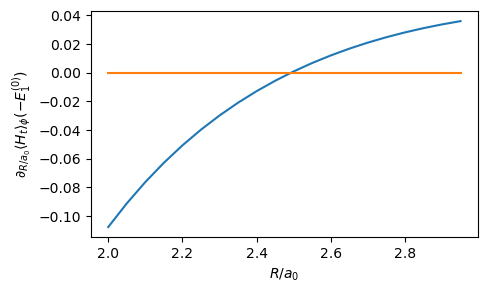

In [66]:
matplotlib.rcParams.update({'font.size':10}); plt.figure(figsize = (5,3), dpi = 100)
x = np.arange(2,3,0.05); y = dHtm(x); y1 = 0*x
plt.plot(x,y); plt.plot(x,y1)
plt.ylabel(r'$\partial_{R/a_{0}}\langle H_{t}\rangle_{\phi}(-E_{1}^{(0)})$'); plt.xlabel(r'$R/a_{0}$'); plt.show()

In [27]:
%run numerics.ipynb
bissection(dHtm, 2, 3, 10**-5, 10**3) # valor otimo de x = R/a0

In [70]:
2.49283218383789*a0  # valor otimo de R

In [33]:
def bohr(Z,n): # em eV
    return ((-((k*e**2)/(2*a0))/e)*Z**2)/n**2

In [74]:
# energia em unidades de -E1, em eV e energia de ligacao
Htm(2.49283218383789), Htm(2.49283218383789)*(-bohr(1,1)), bohr(1,1)-Htm(2.49283218383789)*(-bohr(1,1))

### Estabilidade da molécula

Em torno do ponto de mínima energia, $R_{opt}$, a curva de energia pode ser aproximada por aquela de um oscilador harmônico:
\begin{align} 
& U=\frac{m\omega^{2}x^{2}}{2}\ \therefore\ \partial_{xx}U = m\omega^{2} \\
& \omega = \sqrt{\partial_{xx}U/m}.
\end{align}
Com a ajuda do código abaixo, obtemos
$$\big(\partial_{xx}f(x)\big)_{R_{opt}} \approx 0.13.$$
Notemos que como $x=R/a_{0}$, teremos
$$\partial_{xx}=\partial_{x}\partial_{x} = \partial_{x}R\partial_{R}\partial_{x}R\partial_{R} = a_{0}^{2}\partial_{RR}.$$
Então
\begin{align}
\omega & = \sqrt{\frac{\partial_{RR}\langle H_{t}\rangle}{m}} = \sqrt{\frac{-(E_{1}^{(0)}/a_{0}^{2})\partial_{xx}f(x)}{m}} \\
& \approx 3.42\times 10^{14}\text{ Hz}.
\end{align}
com $m=(m_{p}m_{p})/(m_{p}+m_{p}) = m_{p}/2$ sendo a massa reduzida dos 2 prótons.

In [29]:
def ddHtm(x):
    Htm_ = -1 + (2*x**-1)*(((1-2*x**2/3)*exp(-x)+(1+x)*exp(-2*x))/(1+(1+x+x**2/3)*exp(-x)))
    d2 = diff(Htm_,x,2)
    return d2
print(simplify(ddHtm(x)))

2*(2*x**4*(x + 1)**2*(3*x + (3 - 2*x**2)*exp(x) + 3) + 12*x**3*(x**2 + 3*x + 3*exp(x) + 3)**2 - 2*x**2*(x + 1)*(3*x + (3 - 2*x**2)*exp(x) + 3)*(x**2 + 3*x + 3*exp(x) + 3) + x**2*(-2*x*(x + 1)*(6*x + (-2*x**2 + 4*x + 3)*exp(x) + 3) + (3*x + (3 - 2*x**2)*exp(x) + 3)*(-x**2 + x + 1))*(x**2 + 3*x + 3*exp(x) + 3) + x**2*(-2*x**2 + 8*x - 1)*(x**2 + 3*x + 3*exp(x) + 3)**2*exp(x) + 2*x*(6*x + (-2*x**2 + 4*x + 3)*exp(x) + 3)*(x**2 + 3*x + 3*exp(x) + 3)**2 + 2*(3*x + (3 - 2*x**2)*exp(x) + 3)*(x**2 + 3*x + 3*exp(x) + 3)**2)*exp(-x)/(x**3*(x**2 + 3*x + 3*exp(x) + 3)**3)


In [31]:
def d2Htm(x):
    d2 = 2*(2*x**4*(x + 1)**2*(3*x + (3 - 2*x**2)*exp(x) + 3) 
            + 12*x**3*(x**2 + 3*x + 3*exp(x) + 3)**2 
            - 2*x**2*(x + 1)*(3*x + (3 - 2*x**2)*exp(x) + 3)*(x**2 + 3*x + 3*exp(x) + 3) 
            + x**2*(-2*x*(x + 1)*(6*x + (-2*x**2 + 4*x + 3)*exp(x) + 3) 
                    + (3*x + (3 - 2*x**2)*exp(x) + 3)*(-x**2 + x + 1))*(x**2 + 3*x + 3*exp(x) + 3) 
            + x**2*(-2*x**2 + 8*x - 1)*(x**2 + 3*x + 3*exp(x) + 3)**2*exp(x) 
            + 2*x*(6*x + (-2*x**2 + 4*x + 3)*exp(x) + 3)*(x**2 + 3*x + 3*exp(x) + 3)**2 
            + 2*(3*x + (3 - 2*x**2)*exp(x) + 3)*(x**2 + 3*x + 3*exp(x) + 3)**2)*exp(-x)/(x**3*(x**2 + 3*x + 3*exp(x) + 3)**3)
    return d2
d2Htm(2.49283218383789)

In [38]:
# frequencia
om = sqrt((-((bohr(1,1)*e)/a0**2)*0.125665661374464)/(mp/2)) # passa a energia pra Joules
om

Para o estado fundamental do oscilador harmônico quântico teremos a energia
$$E_{0} = \frac{\hbar\omega}{2} = 0.11\text{ eV},$$
que é menor que a energia de ligação do $H_{2}^{+}$, que é $1.76\text{ eV}$. Portanto, pelo menos para este estado de oscilação nossos cálculos indicam que a $H_{2}^{+}$ não se quebrará.

Podemos obter também o número de estados do oscilador harmônico tais que $H_{2}^{+}$ não se quebra. Obtemos isso impondo
\begin{align}
\hbar\omega(n+1/2) \le 1.76\text{ eV}\ \therefore\ n\le \frac{1.76\text{ eV}}{\hbar\omega}-\frac{1}{2} \approx 7.32.
\end{align}
Temos então 8 estados ligados do oscilador para os quais a molécula é estável.

Vale notar que a energia térmica a temperatura ambiente ($300\text{ K}$) é aproximandamente $0.04\text{ eV}$, e portanto não é suficiente para excitar os modos de oscilação do oscilador a ponto de quebrar a molécula (cuja menor energia e $0.11\text{ eV}$).

In [37]:
((hb*342010081346730)/2)/e # energia de oscilacao em eV

In [40]:
# No. de estados ligados
nmax = (1.76)/(hb*om/e) -1/2; nmax

In [12]:
T = 300; (3*kB*T/2)/e # energia termica para temperatura ambiente

## A molécula de hidrogênio $(H_{2})$

Neste caso teremos um sistema constituído por 2 elétrons e 2 prótons. Consideraremos inicialmente que os prótons estão parados e separados por uma distância $R$. Com isso, o hamiltoniano deste sistema fica escrito como segue:
$$H = -\frac{\hbar^{2}}{2m_{e}}\big(\nabla_{1}^{2}+\nabla_{2}^{2}\big)-ke^{2}\Big(\frac{1}{r_{1}}+\frac{1}{r_{2}}+\frac{1}{r_{1}'}+\frac{1}{r_{2}'}-\frac{1}{r_{12}}-\frac{1}{R}\Big),$$
em que $r_{j}(r_{j}')$ é a distância entre o elétron $j$ e o próton $1(2)$ e $r_{12}$ é a distância entre os elétrons.

<img src='fig_H2.png' width='250'>

Como focamos na função de onda dos elétrons, e temos um sistema constituído por 2 elétrons, que são férmions, pelo princípio de exclusão de Pauli, a função de onda destes elétrons deve ser antisimétrica pela troca deles. Então, se usamos a função de onda de átomo hidrogenóide para montar nossa função de onda teste, devemos ter uma das seguintes funções de onda teste completas:
\begin{align}
& \Phi_{+}(\vec{r}_{1},\vec{r}_{2}) = \phi_{+}(\vec{r}_{1},\vec{r}_{2})\chi_{s}, \\
& \Phi_{-}(\vec{r}_{1},\vec{r}_{2}) = \phi_{-}(\vec{r}_{1},\vec{r}_{2})\chi_{t},
\end{align}
com as funções de onda de spin singleto, $\chi_{s}$, e tripleto, $\chi_{t}$, dadas por
\begin{align}
& \chi_{s} = \frac{1}{\sqrt{2}}\big(|\uparrow_{1}\rangle|\downarrow_{2}\rangle-|\downarrow_{1}\rangle|\uparrow_{2}\rangle\big), \\
& \chi_{t} = \begin{cases}|\uparrow_{1}\rangle|\uparrow_{2}\rangle \\ \frac{1}{\sqrt{2}}\big(|\uparrow_{1}\rangle|\downarrow_{2}\rangle+|\downarrow_{1}\rangle|\uparrow_{2}\rangle\big) \\
|\downarrow_{1}\rangle|\downarrow_{2}\rangle \end{cases},
\end{align}
enquanto que as respectivas funções de onda espaciais são
\begin{align}
& \phi_{+}(\vec{r}_{1},\vec{r}_{2}) = A_{+}\big(\psi_{0}(r_{1})\psi_{0}(r_{2}')+\psi_{0}(r_{2})\psi_{0}(r_{1}')\big), \\
& \phi_{-}(\vec{r}_{1},\vec{r}_{2}) = A_{-}\big(\psi_{0}(r_{1})\psi_{0}(r_{2}')-\psi_{0}(r_{2})\psi_{0}(r_{1}')\big),
\end{align}
com 
$$\psi_{0}(r)=\sqrt{\frac{1}{\pi a_{0}^{3}}}e^{-r/a_{0}}$$ 
sendo a função de onda do estado fundamental do átomo de hidrogênio. Essas funções de onda teste variacionais constituem a chamada __aproximação de Heitler-London__.

Aplicando a normalização, teremos
\begin{align}
1 & = \iint d^{3}r_{1}d^{3}r_{2}|\phi_{+}|^{2} \\
& = |A_{+}|^{2}\int d^{3}r_{1}\int d^{3}r_{2}\big(\psi_{0}(r_{1})^{*}\psi_{0}(r_{2}')^{*}+\psi_{0}(r_{2})^{*}\psi_{0}(r_{1}')^{*}\big)\big(\psi_{0}(r_{1})\psi_{0}(r_{2}')+\psi_{0}(r_{2})\psi_{0}(r_{1}')\big) \\
& = |A_{+}|^{2}\Big(\int d^{3}r_{1}|\psi_{0}(r_{1})|^{2}\int d^{3}r_{2}|\psi_{0}(r_{2}')|^{2} + \int d^{3}r_{1}|\psi_{0}(r_{1}')|^{2}\int d^{3}r_{2}|\psi_{0}(r_{2})|^{2} \\
& \hspace{2cm} + 2\int d^{3}r_{1}\psi_{0}(r_{1})\psi_{0}(r_{1}')\int d^{3}r_{2}\psi_{0}(r_{2})\psi_{0}(r_{2}')\Big) \\
& = |A_{+}|^{2}\Big((1)(1) + (1)(1) + 2(I)(I)\Big), \\
& \therefore\ A_{+} = \frac{1}{\sqrt{2(1+I^{2})}},
\end{align}
em que a integral de overlap foi calculada quando estudamos a molécula de $H_{2}^{+}$, e é dada por 
$$I= \int d^{3}r_{1} \psi_{0}(r_{1})\psi_{0}(r_{1}')=\Big(\frac{R^{2}}{3a_{0}^{2}} + \frac{R}{a_{0}}+1\Big)e^{-R/a_{0}}.$$

Tendo a função de onda teste normalizada, passemos para o cálculo do valor médio do hamiltoniano
\begin{align}
\langle H\rangle_{\phi} & = \Big\langle\frac{-\hbar^{2}}{2m_{e}}\nabla_{1}^{2}\Big\rangle_{\phi} + \Big\langle\frac{-\hbar^{2}}{2m_{e}}\nabla_{2}^{2}\Big\rangle_{\phi} + \Big\langle\frac{-ke^{2}}{r_{1}}\Big\rangle_{\phi}  + \Big\langle\frac{-ke^{2}}{r_{2}}\Big\rangle_{\phi}  \\
& + \Big\langle\frac{-ke^{2}}{r_{1}'}\Big\rangle_{\phi}  + \Big\langle\frac{-ke^{2}}{r_{2}'}\Big\rangle_{\phi}  + \Big\langle\frac{ke^{2}}{r_{12}}\Big\rangle_{\phi}  + \Big\langle\frac{ke^{2}}{R}\Big\rangle_{\phi}.
\end{align}
Pela complexidade do problema, faremos isso termo a termo. Começamos com a energia cinética do elétron 1:

\begin{align}
\langle K_{1}\rangle_{\phi} & = \Big\langle -\frac{\hbar^{2}}{2m_{e}}\nabla_{1}^{2}\Big\rangle_{\phi} = \iint d^{3}r_{1}d^{3}r_{2}\phi^{*}\Big(-\frac{\hbar^{2}}{2m_{e}}\nabla_{1}^{2}\Big)\phi \\
& = \iint d^{3}r_{1}d^{3}r_{2}\phi^{*}\Big(-\frac{\hbar^{2}}{2m_{e}}\nabla_{1}^{2}\Big)A_{+}\big(\psi_{0}(r_{1})\psi_{0}(r_{2}')+\psi_{0}(r_{2})\psi_{0}(r_{1}')\big) \\
& = \iint d^{3}r_{1}d^{3}r_{2}\phi^{*}A_{+}\Big(\Big(-\frac{\hbar^{2}}{2m_{e}}\nabla_{1}^{2}\psi_{0}(r_{1})\Big)\psi_{0}(r_{2}')+\psi_{0}(r_{2})\Big(\Big(-\frac{\hbar^{2}}{2m_{e}}\nabla_{1}^{2}\psi_{0}(r_{1}')\Big)\Big) \\
& = \iint d^{3}r_{1}d^{3}r_{2}\phi^{*}A_{+}\Big(\Big(\Big(-\frac{\hbar^{2}}{2m_{e}}\nabla_{1}^{2}-\frac{ke^{2}}{r_{1}}+\frac{ke^{2}}{r_{1}}\Big)\psi_{0}(r_{1})\Big)\psi_{0}(r_{2}')\\
& \hspace{4cm} +\psi_{0}(r_{2})\Big(\Big(\Big(-\frac{\hbar^{2}}{2m_{e}}\nabla_{1}^{2}-\frac{ke^{2}}{r_{1}'}+\frac{ke^{2}}{r_{1}'}\Big)\psi_{0}(r_{1}')\Big)\Big) \\
& = \iint d^{3}r_{1}d^{3}r_{2}\phi^{*}A_{+}\Big(\Big(\Big(E_{1}^{(0)}+\frac{ke^{2}}{r_{1}}\Big)\psi_{0}(r_{1})\Big)\psi_{0}(r_{2}') + \psi_{0}(r_{2})\Big(\Big(E_{1}^{(0)}+\frac{ke^{2}}{r_{1}'}\Big)\psi_{0}(r_{1}')\Big)\Big) \\
& = \iint d^{3}r_{1}d^{3}r_{2}\phi^{*}\Big(E_{1}^{(0)}\phi + A_{+}ke^{2}\Big(\frac{1}{r_{1}}\psi_{0}(r_{1})\psi_{0}(r_{2}') + \frac{1}{r_{1}'}\psi_{0}(r_{1}')\psi_{0}(r_{2})\Big)\Big) \\
& = E_{1}^{(0)} + A_{+}ke^{2}\iint d^{3}r_{1}d^{3}r_{2}\phi^{*}\Big(\frac{1}{r_{1}}\psi_{0}(r_{1})\psi_{0}(r_{2}') + \frac{1}{r_{1}'}\psi_{0}(r_{1}')\psi_{0}(r_{2})\Big) \\
& = E_{1}^{(0)} + A_{+}^{2}ke^{2}\Big(\int d^{3}r_{1}\psi_{0}(r_{1})\frac{1}{r_{1}}\psi_{0}(r_{1})\int d^{3}r_{2}|\psi_{0}(r_{2}')|^{2} + \int d^{3}r_{1}\psi_{0}(r_{1})\frac{1}{r_{1}'}\psi_{0}(r_{1}')\int d^{3}r_{2}\psi_{0}(r_{2}')\psi_{0}(r_{2}) \\
& +  \int d^{3}r_{1}\psi_{0}(r_{1}')\frac{1}{r_{1}}\psi_{0}(r_{1})\int d^{3}r_{2}\psi_{0}(r_{2})\psi_{0}(r_{2}') + \int d^{3}r_{1}\psi_{0}(r_{1}')\frac{1}{r_{1}'}\psi_{0}(r_{1}')\int d^{3}r_{2}|\psi_{0}(r_{2})|^{2}\Big) \\
& = E_{1}^{(0)} + 2A_{+}^{2}ke^{2}\Big(\int d^{3}r_{1}\psi_{0}(r_{1})\frac{1}{r_{1}}\psi_{0}(r_{1})\int d^{3}r_{2}|\psi_{0}(r_{2}')|^{2} + \int d^{3}r_{1}\psi_{0}(r_{1})\frac{1}{r_{1}'}\psi_{0}(r_{1}')\int d^{3}r_{2}\psi_{0}(r_{2}')\psi_{0}(r_{2})\Big) \\
& = E_{1}^{(0)} + 2A_{+}^{2}ke^{2}\Big(\Big\langle\frac{1}{r}\Big\rangle_{\psi_{0}}(1) + I_{T}I \Big) \\
& = E_{1}^{(0)} + \frac{2ke^{2}\big(a_{0}^{-1}+I_{T}I\big)}{2(1+I^{2})}  = E_{1}^{(0)} + \frac{ke^{2}\big(a_{0}^{-1}+I_{T}I\big)}{1+I^{2}} \\
& = E_{1}^{(0)} + \frac{-2a_{0}E_{1}^{(0)}\big(a_{0}^{-1}+I_{T}I\big)}{1+I^{2}} = E_{1}^{(0)}\Big(1-\frac{2\big(1+a_{0}I_{T}I\big)}{1+I^{2}}\Big),
\end{align}

em que $\vec{\nabla}_{1}$ atua no espaço de estados do elétron 1 e já tínhamos calculado 
a integral de troca 
$$I_{T} = \int d^{3}r_{1} \psi_{0}(r_{1})\frac{1}{r_{1}}\psi_{0}(r_{1}') = \frac{1}{a_{0}}\Big(1+\frac{R}{a_{0}}\Big)e^{-R/a_{0}}$$
e 
$$\Big\langle\frac{1}{r}\Big\rangle_{\psi_{0}}=\frac{Z}{a_{0}}=\frac{1}{a_{0}}.$$ Acima e doravante usamos 
$$ke^{2} = ke^{2}\frac{E_{1}^{(0)}}{E_{1}^{(0)}}=ke^{2}\frac{-2a_{0}}{ke^{2}}E_{1}^{(0)} = -2a_{0}E_{1}^{(0)}.$$

Pela simetria do sistema, os 2 elétrons possuem a mesma energia cinética média:
$$\langle K_{2}\rangle_{\phi} = \langle K_{1}\rangle_{\phi}.$$

O valor médio da energia de interação elétron-próton é
\begin{align}
\langle U_{ep1}\rangle_{\phi} & = \Big\langle \frac{-ke^{2}}{r_{1}}\Big\rangle = -ke^{2}\iint d^{3}r_{1}d^{3}r_{2}\phi^{*}\frac{1}{r_{1}}\phi \\
& = -ke^{2}A_{+}^{2}\iint d^{3}r_{1}d^{3}r_{2}\big(\psi_{0}(r_{1})\psi_{0}(r_{2}')+\psi_{0}(r_{2})\psi_{0}(r_{1}')\big)\frac{1}{r_{1}}\big(\psi_{0}(r_{1})\psi_{0}(r_{2}')+\psi_{0}(r_{2})\psi_{0}(r_{1}')\big) \\
& = -ke^{2}A_{+}^{2}\Big(\int d^{3}r_{1}\psi_{0}(r_{1})\frac{1}{r_{1}}\psi_{0}(r_{1})\int d^{3}r_{2}\psi_{0}(r_{2}')^{2} + \int d^{3}r_{1}\psi_{0}(r_{1})\frac{1}{r_{1}}\psi_{0}(r_{1}')\int d^{3}r_{2}\psi_{0}(r_{2}')\psi_{0}(r_{2}) \\
& + \int d^{3}r_{1}\psi_{0}(r_{1}')\frac{1}{r_{1}}\psi_{0}(r_{1})\int d^{3}r_{2}\psi_{0}(r_{2})\psi_{0}(r_{2}') + \int d^{3}r_{1}\psi_{0}(r_{1}')\frac{1}{r_{1}}\psi_{0}(r_{1}')\int d^{3}r_{2}\psi_{0}(r_{2})^{2} \Big) \\
& = -ke^{2}A_{+}^{2}\big(a_{0}^{-1}(1) + 2I_{T}I + I_{D}(1) \big) \\
& = -\frac{ke^{2}\big(a_{0}^{-1} + 2I_{T}I + I_{D} \big)}{2\big(1+I^{2}\big)} = -\frac{-2a_{0}E_{1}^{(0)}\big(a_{0}^{-1} + 2I_{T}I + I_{D} \big)}{2\big(1+I^{2}\big)} \\
& = E_{1}^{(0)}\frac{\big(1 + 2a_{0}I_{T}I + a_{0}I_{D} \big)}{\big(1+I^{2}\big)},
\end{align}
em que usamos a integral direta 
$$I_{D} = \int d^{3}r \psi_{0}(r)\frac{1}{r_{2}}\psi_{0}(r) = \frac{1}{a_{0}}\Big(\frac{a_{0}}{R} - \Big(\frac{a_{0}}{R} + 1\Big)e^{-2R/a_{0}}\Big),$$
obtida anteriormente.

Novamente, pela simetria do sistema, teremos que
$$\Big\langle \frac{-ke^{2}}{r_{1}}\Big\rangle = \Big\langle \frac{-ke^{2}}{r_{2}}\Big\rangle = \Big\langle \frac{-ke^{2}}{r_{1}'}\Big\rangle = \Big\langle \frac{-ke^{2}}{r_{2}'}\Big\rangle.$$
Portanto, o valor médio da energia total de interação elétron-próton é
$$\langle U_{ep}\rangle_{\phi} = 4\langle U_{ep1}\rangle_{\phi}.$$

Seguindo, passamos para o cálculo do valor médio da interação elétron-elétron:
\begin{align}
\langle U_{ee}\rangle_{\phi} & = \Big\langle\frac{ke^{2}}{r_{12}}\Big\rangle_{\phi} =  ke^{2}\iint d^{3}r_{1}d^{3}r_{2}\phi^{*}\frac{1}{r_{12}}\phi \\
& =  ke^{2}A_{+}^{2}\iint d^{3}r_{1}d^{3}r_{2}\big(\psi_{0}(r_{1})\psi_{0}(r_{2}')+\psi_{0}(r_{2})\psi_{0}(r_{1}')\big)\frac{1}{r_{12}}\big(\psi_{0}(r_{1})\psi_{0}(r_{2}')+\psi_{0}(r_{2})\psi_{0}(r_{1}')\big) \\
& =  ke^{2}A_{+}^{2}\Big(\iint d^{3}r_{1}d^{3}r_{2}|\psi_{0}(r_{1})|^{2}|\psi_{0}(r_{2}')|^{2}\frac{1}{r_{12}} + \iint d^{3}r_{1}d^{3}r_{2}|\psi_{0}(r_{2})|^{2}|\psi_{0}(r_{1}')|^{2}\frac{1}{r_{12}} \\
& \hspace{2cm} + \iint d^{3}r_{1}d^{3}r_{2}\psi_{0}(r_{1})\psi_{0}(r_{2}')\frac{1}{r_{12}}\psi_{0}(r_{2})\psi_{0}(r_{1}') + \iint d^{3}r_{1}d^{3}r_{2}\psi_{0}(r_{2})\psi_{0}(r_{1}')\frac{1}{r_{12}}\psi_{0}(r_{1})\psi_{0}(r_{2}') \Big)\\
& =  2ke^{2}A_{+}^{2}\Big(\iint d^{3}r_{1}d^{3}r_{2}|\psi_{0}(r_{1})|^{2}|\psi_{0}(r_{2}')|^{2}\frac{1}{r_{12}} + \iint d^{3}r_{1}d^{3}r_{2}\psi_{0}(r_{1})\psi_{0}(r_{2}')\frac{1}{r_{12}}\psi_{0}(r_{2})\psi_{0}(r_{1}') \Big) \\
& =: \frac{2ke^{2}\big(I_{d}+I_{t}\big)}{2\big(1+I^{2}\big)} = \frac{ke^{2}\big(I_{d}+I_{t}\big)}{1+I^{2}} \\
& = \frac{-2a_{0}E_{1}^{(0)}\big(I_{d}+I_{t}\big)}{1+I^{2}} = -2E_{1}^{(0)}\frac{\big(a_{0}I_{d}+a_{0}I_{t}\big)}{1+I^{2}},
\end{align}
em que definimos
\begin{align}
& I_{d} := \iint d^{3}r_{1}d^{3}r_{2}|\psi_{0}(r_{1})|^{2}|\psi_{0}(r_{2}')|^{2}\frac{1}{r_{12}}, \\
& I_{t} := \iint d^{3}r_{1}d^{3}r_{2}\psi_{0}(r_{1})\psi_{0}(r_{2}')\frac{1}{r_{12}}\psi_{0}(r_{2})\psi_{0}(r_{1}').
\end{align}

Passemos agora para o cálculo dessas integrais. A primeira integral pode ser identificada com a energia potencial eletrostática de duas distribuições de carga elétrica $\rho_{1} = |\psi_{0}(r_{1})|^{2}$ e $\rho_{2} = |\psi_{0}(r_{2})|^{2}$:
\begin{align}
I_{d} & = \iint d^{3}r_{1}d^{3}r_{2}|\psi_{0}(r_{1})|^{2}|\psi_{0}(r_{2}')|^{2}\frac{1}{r_{12}} \\
& = \frac{1}{\pi a_{0}^{3}}\int d^{3}r_{2}|\psi_{0}(r_{2}')|^{2}\int_{0}^{\infty}r_{1}^{2}e^{-2r_{1}/a_{0}}dr_{1}\int_{0}^{\pi}\frac{\sin\theta_{1} d\theta_{1}}{\sqrt{r_{1}^{2}+r_{2}^{2}-2r_{1}r_{2}\cos\theta_{1}}}\int_{0}^{2\pi}d\phi_{1} \\
& = \frac{2\pi}{\pi a_{0}^{3}}\int d^{3}r_{2}|\psi_{0}(r_{2}')|^{2}\int_{0}^{\infty}r_{1}^{2}e^{-2r_{1}/a_{0}}dr_{1}\int_{(r_{1}-r_{2})^{2}}^{(r_{1}+r_{2})^{2}}y^{-1/2}\frac{dy}{2r_{1}r_{2}} \\
& = \frac{1}{a_{0}^{3}}\int d^{3}r_{2}\frac{|\psi_{0}(r_{2}')|^{2}}{r_{2}}\int_{0}^{\infty}r_{1}e^{-2r_{1}/a_{0}}dr_{1}\Big(\frac{\sqrt{y}}{1/2}\Big)_{(r_{1}-r_{2})^{2}}^{(r_{1}+r_{2})^{2}} \\
& = \frac{2}{a_{0}^{3}}\int d^{3}r_{2}\frac{|\psi_{0}(r_{2}')|^{2}}{r_{2}}\int_{0}^{\infty}r_{1}e^{-2r_{1}/a_{0}}dr_{1}\Big(\sqrt{(r_{1}+r_{2})^{2}}-\sqrt{(r_{1}-r_{2})^{2}}\Big) \\
& = \frac{2}{a_{0}^{3}}\int d^{3}r_{2}\frac{|\psi_{0}(r_{2}')|^{2}}{r_{2}}\int_{0}^{\infty}r_{1}e^{-2r_{1}/a_{0}}dr_{1}\big(r_{1}+r_{2}-|r_{1}-r_{2}|\big) \\
& = \frac{2}{a_{0}^{3}}\int d^{3}r_{2}\frac{|\psi_{0}(r_{2}')|^{2}}{r_{2}}\Big(\int_{0}^{r_{2}}r_{1}e^{-2r_{1}/a_{0}}dr_{1}\big(r_{1}+r_{2}-r_{2}+r_{1}|\big) + \int_{r_{2}}^{\infty}r_{1}e^{-2r_{1}/a_{0}}dr_{1}\big(r_{1}+r_{2}-r_{1}+r_{2}\big) \Big) \\
& = \frac{2}{a_{0}^{3}}\int d^{3}r_{2}\frac{|\psi_{0}(r_{2}')|^{2}}{r_{2}}\Big(2\int_{0}^{r_{2}}r_{1}^{2}e^{-2r_{1}/a_{0}}dr_{1} + 2r_{2}\int_{r_{2}}^{\infty}r_{1}e^{-2r_{1}/a_{0}}dr_{1} \Big) \\
& = \frac{4}{a_{0}^{3}}\int d^{3}r_{2}\frac{|\psi_{0}(r_{2}')|^{2}}{r_{2}}\Big(\frac{a_{0}^{3}}{4}\Big(1-\big(1+r_{2}/a_{0}\big)e^{-2r_{2}/a_{0}}\Big)\Big) \\
& = \int d^{3}r_{2}\frac{|\psi_{0}(r_{2}')|^{2}}{r_{2}}\Big(1-\big(1+r_{2}/a_{0}\big)e^{-2r_{2}/a_{0}}\Big),
\end{align}
em que $\theta_{1}$ é o ângulo entre $\vec{r}_{1}$ e $\vec{r}_{2}$. Acima fizemos a mudança de variável $y = r_{1}^{2}+r_{2}^{2}-2r_{1}r_{2}\cos\theta_{1}\ \therefore\ dy = 2r_{1}r_{2}\sin\theta_{1}d\theta_{1}$. Assim $\theta_{1}=0\Rightarrow y = (r_{1}-r_{2})^{2}$ e $\theta_{1}=\pi\Rightarrow y = (r_{1}+r_{2})^{2}$.

In [19]:
r1,r2,A0 = symbols('r_1 r_2 a_0', positive=True)

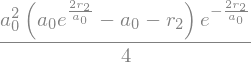

In [20]:
simplify(integrate(r1**2*exp(-2*r1/A0), (r1,0,r2)) + r2*integrate(r1*exp(-2*r1/A0), (r1,r2,oo)))

Continuando com o cálculo da integral acima, teremos
\begin{align}
I_{d} & = \frac{1}{\pi a_{0}^{3}}\int_{0}^{\infty}\frac{1}{r_{2}}\Big(1-\big(1+r_{2}/a_{0}\big)e^{-2r_{2}/a_{0}}\Big)r_{2}^{2}dr_{2}\int_{0}^{\pi}e^{-2r_{2}'/a_{0}}\sin\theta_{2}d\theta_{2}\int_{0}^{2\pi}d\phi_{2} \\
& = \frac{2\pi}{\pi a_{0}^{3}}\int_{0}^{\infty}\Big(1-\big(1+r_{2}/a_{0}\big)e^{-2r_{2}/a_{0}}\Big)r_{2}dr_{2}\int_{0}^{\pi}e^{-2\sqrt{r_{2}^{2}+R^{2}-2r_{2}R\cos\theta_{2}}/a_{0}}\sin\theta_{2}d\theta_{2} \\
& = \frac{2}{a_{0}^{3}}\int_{0}^{\infty}\Big(1-\big(1+r_{2}/a_{0}\big)e^{-2r_{2}/a_{0}}\Big)r_{2}dr_{2}\int_{2|r_{2}-R|/a_{0}}^{2(r_{2}+R)/a_{0}}e^{-y}\frac{a_{0}^{2}ydy}{4r_{2}R} \\
& = \frac{1}{2a_{0}}\int_{0}^{\infty}\Big(1-\big(1+r_{2}/a_{0}\big)e^{-2r_{2}/a_{0}}\Big)dr_{2}\Big(-\big(1+2(r_{2}+R)/a_{0}\big)e^{-2(r_{2}+R)/a_{0}} + \big(1+2|r_{2}-R|/a_{0}\big)e^{-2|r_{2}-R|/a_{0}} \Big) \\
& = -\frac{1}{2a_{0}}\Big(\int_{0}^{\infty}\Big(1-\big(1+r_{2}/a_{0}\big)e^{-2r_{2}/a_{0}}\Big)\big(1+2(r_{2}+R)/a_{0}\big)e^{-2(r_{2}+R)/a_{0}}dr_{2} \\
& \hspace{2cm} - \int_{0}^{\infty}\Big(1-\big(1+r_{2}/a_{0}\big)e^{-2r_{2}/a_{0}}\Big)\big(1+2|r_{2}-R|/a_{0}\big)e^{-2|r_{2}-R|/a_{0}} \Big)  \\
& = -\frac{1}{2a_{0}}\Big(\int_{0}^{\infty}\Big(1-\big(1+r_{2}/a_{0}\big)e^{-2r_{2}/a_{0}}\Big)\big(1+2(r_{2}+R)/a_{0}\big)e^{-2(r_{2}+R)/a_{0}}dr_{2} \\
& \hspace{2cm} - \int_{0}^{R}\Big(1-\big(1+r_{2}/a_{0}\big)e^{-2r_{2}/a_{0}}\Big)\big(1+2(R-r_{2})/a_{0}\big)e^{-2(R-r_{2})/a_{0}}dr_{2} \\
& \hspace{2cm} - \int_{R}^{\infty}\Big(1-\big(1+r_{2}/a_{0}\big)e^{-2r_{2}/a_{0}}\Big)\big(1+2(r_{2}-R)/a_{0}\big)e^{-2(r_{2}-R)/a_{0}}dr_{2} \Big) \\
& = -\frac{1}{2a_{0}}\Big(-2a_{0} + \Big(\frac{1}{3}\frac{R^{3}}{a_{0}^{2}} + \frac{3}{2}\frac{R^{2}}{a_{0}} + \frac{11}{4}R + 2a_{0}\Big)e^{-2R/a_{0}} \Big) \\
& = 1 - \Big(\frac{R^{3}}{6a_{0}^{3}} + \frac{3R^{2}}{4a_{0}^{2}} + \frac{11R}{8a_{0}} + 1 \Big)e^{-2R/a_{0}},
\end{align}
em que $\theta_{2}$ é o ângulo entre $\vec{r}_{2}$ e $\vec{R}$. Acima usamos a mudança de variável $y=2\sqrt{r_{2}^{2}+R^{2}-2r_{2}R\cos\theta_{2}}/a_{0}\ \therefore\ a_{0}^{2}d(y^{2})=a_{0}^{2}2ydy = 8r_{2}R\sin\theta_{2}d\theta_{2}$. Assim $\theta_{2}=0\Rightarrow y = 2|r_{2}-R|/a_{0}$ e $\theta_{2}=\pi\Rightarrow y = 2(r_{2}+R)/a_{0}$.

_OBS._ Nesse meu cálculo está faltando um $1/R$ em relação ao resultado certo (do D. Griffiths).

In [28]:
y,th2,R = symbols('y theta_2 R')
integrate(y*exp(-y))

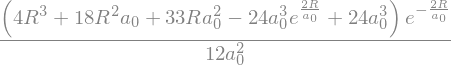

In [30]:
simplify( integrate( (1-(1+r2/A0)*exp(-2*r2/A0))*(1+2*(r2+R)/A0)*exp(-2*(r2+R)/A0), (r2,0,oo) ) 
        - integrate( (1-(1+r2/A0)*exp(-2*r2/A0))*(1+2*(R-r2)/A0)*exp(-2*(R-r2)/A0), (r2,0,R) ) 
        - integrate( (1-(1+r2/A0)*exp(-2*r2/A0))*(1+2*(r2-R)/A0)*exp(-2*(r2-R)/A0), (r2,R,oo) ) )

In [ ]:
def Htm(x): # em unidade de -E_1^0
    return -1 + (2*x**-1)*(((1-2*x**2/3)*np.exp(-x)+(1+x)*np.exp(-2*x))/(1+(1+x+x**2/3)*np.exp(-x)))

In [ ]:
matplotlib.rcParams.update({'font.size':10}); plt.figure(figsize = (5,4), dpi = 100)
x = np.arange(1,10,0.05)
y = Htm(x)
plt.plot(x,y)
plt.ylabel(r'$\langle H_{t}\rangle_{\phi}(-E_{1}^{(0)})$'); plt.xlabel(r'$R/a_{0}$'); plt.show()

Vamos tratar agora da outra integral
\begin{align}
I_{t} & = \iint d^{3}r_{1}d^{3}r_{2}\psi_{0}(r_{1})\psi_{0}(r_{2}')\frac{1}{r_{12}}\psi_{0}(r_{2})\psi_{0}(r_{1}') \\
& = \frac{1}{(\pi a_{0}^{3})^{2}}\int d^{3}r_{2}e^{-(r_{2}+r_{2}')/a_{0}}\int d^{3}r_{1}\frac{e^{-(r_{1}+r_{1}')/a_{0}}}{r_{12}} \\
& \vdots \text{ (Y. SUGIURA, Über die Eigenschaften des Wasserstoffmoleküls im Grundzustande, Z. Phys. 46, 484 (1927).)} \\
& = \frac{e^{-2R/a_{0}}}{a_{0}}\Big(\frac{5}{8}-\frac{23R}{20 a_{0}} - \frac{3}{5}\Big(\frac{R}{a_{0}}\Big)^{2}-\frac{1}{15}\Big(\frac{R}{a_{0}}\Big)^{3}\Big) \\
& + \frac{6I^{2}}{5R}\Big(\gamma \log(R/a_{0}) + (\tilde{I}/I)^{2}Ei(-4R/a_{0}) - 2(\tilde{I}/I)Ei(-2R/a_{0})\Big),
\end{align}
com $\gamma \approx 0.5772$ sendo a constante de Euler, a integral exponencial é
$$Ei(x)=\int_{-x}^{\infty}dt e^{-t}/t$$ 
e $\tilde{I}$ é obtida de $I$ trocando-se o sinal de $R$: 
$$\tilde{I} = e^{R/a_{0}}\big(1+R/a_{0}+(R/a_{0})^{2}/3.$$

Por fim, como por hora estamos considerando $R$ constante, a energia potencial de interação Coulombiana próton-próton é dada por
\begin{align}
\big\langle U_{pp}\big\rangle_{\phi} & = \Big\langle\frac{ke^{2}}{R}\Big\rangle = \iint d^{3}r_{1}d^{3}r_{2}\phi^{*}\frac{ke^{2}}{R}\phi = \frac{ke^{2}}{R}\iint d^{3}r_{1}d^{3}r_{2}|\phi|^{2} \\
& = \frac{ke^{2}}{R}\frac{E_{1}^{(0)}}{E_{1}^{(0)}} = \frac{ke^{2}}{R}\frac{-2a_{0}}{ke^{2}}E_{1}^{(0)} = \frac{-2a_{0}E_{1}^{(0)}}{R}.
\end{align}

Com isso, teremos
\begin{align}
\langle H\rangle_{\phi} & = 2\langle K_{1}\rangle_{\phi} + 4\langle U_{ep1}\rangle_{\phi} + \langle U_{ee}\rangle_{\phi} + \langle U_{pp}\rangle_{\phi} \\
& = 2E_{1}^{(0)}\Big(1-\frac{2\big(1+a_{0}I_{T}I\big)}{1+I^{2}}\Big) + 4E_{1}^{(0)}\frac{\big(1 + 2a_{0}I_{T}I + a_{0}I_{D} \big)}{\big(1+I^{2}\big)} -2E_{1}^{(0)}\frac{\big(a_{0}I_{d}+a_{0}I_{t}\big)}{1+I^{2}} -2E_{1}^{(0)}\frac{a_{0}}{R} \\
& = -2E_{1}^{(0)}\Big(-1+\frac{a_{0}}{R} - \frac{2a_{0}I_{T}I+2a_{0}I_{D}-a_{0}I_{d}-a_{0}I_{t}}{1+I^{2}}\Big).
\end{align}

In [2]:
def Hm_H2(x): # x = R/a0
    I = (x**2/3 + x +1)*math.exp(-x)
    IT = (1+x)*math.exp(-x)#*(1/a0)
    ID = (1/x - (1/x + 1)*math.exp(-2*x))#*(1/a0)
    Id = 1/x - (x**2/6 + (3*x)/4 + 11/8 +1/x)*math.exp(-2*x)
    ga = 0.5772
    Itil = (x**2/3 - x +1)*math.exp(x)
    It = (5/8 - (23*x)/20 - (3/5)*x**2 - (1/15)*x**3)*math.exp(-2*x) 
    + ((6*I**2)/(5*x))*(ga*math.log(x) + (Itil/I)**2*Ei(-4*x) - 2*(Itil/I)*Ei(-2*x) )
    return 2*(-1 + 1/x - ((2*IT*I+2*ID-Id-It)/(1+I**2)))#*(-2*E10)

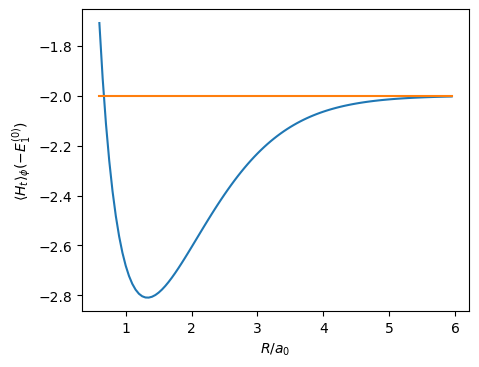

In [7]:
import matplotlib
matplotlib.rcParams.update({'font.size':10}); plt.figure(figsize = (5,4), dpi = 100)
x = np.arange(0.6,6,0.05); d = len(x); y = np.zeros(d); y2 = y-2
for j in range(0,d):
    y[j] = Hm_H2(x[j])
plt.plot(x,y); plt.plot(x,y2)
plt.ylabel(r'$\langle H_{t}\rangle_{\phi}(-E_{1}^{(0)})$'); plt.xlabel(r'$R/a_{0}$')
plt.show()

Aqui podemos fazer toda aquela análise de fizemos para $H_{2}^{+}$, de energia de ligação, frequência de osciplação dos prótons, etc.

# Exercícios

1. Utilize o método variacional para estimar a energia do estado fundamental do oscilador harmônico quântico unidimensional usando como função de onda teste
$$\phi(x,b) = \frac{A}{x^{2}+b^{2}}.$$

1. Normalize a função de onda $$\phi_{1}(x) = Axe^{-bx^{2}}$$ para obter $$A = \sqrt{\frac{2^{3}b^{3/2}}{\sqrt{2\pi}}}.$$

1. Use o método variacional para obter um limite superior para $E_{2}$, a energia do 2º estado excitado. Especifique que propriedades a função de onda deve ter.

1. Verifique que
$$\langle\phi|P^{2}X^{2}|\phi\rangle = \int dx\phi(x)^{*}\big(-i\hbar\partial_{x}\big)^{2}\big(x^{2}\phi(x)\big).$$

1. Verifique que para a função de onda teste da eq. ($*$), o valor médio do hamiltoniano da eq. ($\star$) é dado pela expressão na eq. ($\diamond$).

1. Considerando o íon da molécula de hidrogênio, faça os cálculos para verificar que a função de onda teste 
$$\phi_{-} = A\big(\psi_{0}(r_{1})-\psi_{0}(r_{2})\big)$$
indica um estado não ligado para esta molécula.

1. Qual seria a temperatura para a qual a energia térmica seria a mesma que a energia de oscilação necessária para quebrar a molécula $H_{2}^{+}$?

1. Considerando a molécula de hidrogênio, faça os cálculos para verificar que a função de onda teste 
$$\phi_{-}(\vec{r}_{1},\vec{r}_{2}) = A_{-}\big(\psi_{0}(r_{1})\psi_{0}(r_{2}')-\psi_{0}(r_{2})\psi_{0}(r_{1}')\big)$$
indica um estado não ligado para esta molécula.